In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression#1
from sklearn.ensemble import RandomForestClassifier#2
from sklearn.ensemble import AdaBoostClassifier#3
from sklearn.tree import DecisionTreeClassifier#5-nonpca
from sklearn.ensemble import GradientBoostingClassifier#4

from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_recall_curve,roc_auc_score,f1_score,roc_curve,confusion_matrix

from collections import Counter
from imblearn.over_sampling import SMOTE

#DT Visualizatoin Requirements
from io import StringIO
import pydotplus
from IPython.display import Image, display
from sklearn.tree import export_graphviz
# from sklearn.feature_extraction.image import grid_to_graph

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\Tamma\Desktop\PGD ML & AI\4. Machine Learning - 2\7. Telecom Churn Case Study\telecom_churn_data.csv')

In [4]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
data.shape

(99999, 226)

In [6]:
# data[data.isna().any(axis=1)]

In [7]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
columns = data.columns.to_list()

In [9]:
type(columns)

list

In [10]:
missing_chk = round((data.isna().sum(axis=0)/len(data.index))*100,2)
cols_in_doubt = missing_chk[missing_chk>50]
cols_in_doubt#.index

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [11]:
data.shape

(99999, 226)

In [12]:
data.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803  21.100          NaN   
1            9/30/2014   34.047  355.074  268.321  86.285        24.11   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN            0.0   
1        304.76         53.76            0.0            0.0            0.0   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN            0.0            NaN   
1            0.0            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN               0.0               NaN   
1               0.0               0.0               0.0               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN               0.0               NaN   
1               0.0              2.91               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN               0.0               NaN               NaN   
1              4.11               0.0               0.0               0.0   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.46              0.13               0.0               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0               NaN               0.0               NaN               NaN   
1               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
0               NaN               0.0               NaN           NaN   
1               0.0               0.0               0.0          0.23   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0           NaN          0.00           NaN           NaN           NaN   
1          4.58          0.13           0.0           0.0           0.0   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           NaN           NaN           NaN          0.00   
1           0.0           0.0          4.68         23.43         12.76   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0           NaN          NaN          N

In [13]:
# data.select_dtypes(exclude=['int64','float']) # Date Columns

##### Renaming columns as per data column format

In [14]:
dic = {'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}
data = data.rename(columns=dic)

## Defining High-Value Customers

High-Value Customers based on Good phase

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

In [15]:
# li = []
# for col in data.columns:
#     if '_6' in col:
#         li.append(col)

        
cols = [c for c in data.columns if '_8' not in c]
cols = [c for c in cols if '_9' not in c]
data_6_7 = data[cols]
data_6_7.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7    arpu_6    arpu_7  onnet_mou_6  \
0            6/30/2014            7/31/2014   197.385   214.816          NaN   
1            6/30/2014            7/31/2014    34.047   355.074        24.11   
2            6/30/2014            7/31/2014   167.690   189.058        11.54   
3            6/30/2014            7/31/2014   221.338   251.102        99.91   
4            6/30/2014            7/31/2014   261.636   309.876        50.31   
5            6/30/2014            7/31/2014    50.258    58.810        50.16   
6            6/30/2014            7/31/2014   429.023   190.704        71.03   
7            6/30/2014            7/31/2014  1069.180  1349.850        57.84   
8            6/30/2014            7/31/2014   378.721   492.223       413.69   
9            6/30/2014            7/31/2014   119.518   247.435        33.89   

   onnet_mou_7  offnet_mou_6  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  \
0          NaN           NaN           NaN            NaN            NaN   
1        78.68         15.74         99.84           0.00           0.00   
2        55.24        143.33        220.59           0.00           0.00   
3        54.39        123.31        109.01           0.00          54.86   
4       149.44         76.96         91.88           0.00           0.00   
5        43.63         19.28         13.44           0.00           0.00   
6        45.03        262.73         49.24           0.00           0.00   
7        54.68        453.43        567.16          16.23          33.49   
8       351.03         94.66         80.63           0.00           0.00   
9        30.11         63.48         54.16           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            NaN            NaN               NaN               NaN   
1           0.00           0.00             23.88             74.56   
2           0.00           0.00              7.19             28.74   
3           0.00          28.09             73.68             34.81   
4           0.00           0.00             50.31            149.44   
5           0.00           0.00             50.16             43.63   
6           0.00           0.00             71.03             45.03   
7          23.74          12.59             51.39             31.38   
8           0.00           0.00            297.13            217.59   
9           0.00           0.00             33.89             30.11   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN               NaN               NaN               NaN   
1             11.51             75.94              0.00              0.00   
2             29.34             16.86             24.11             21.79   
3            107.43             83.21              1.91              0.65   
4             67.64             91.88              0.00              0.00   
5             16.39              8.83              0.00              0.00   
6            252.23             48.71             10.38              0.00   
7            308.

#### Based on first two months (Good Phase)
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [16]:
# data.total_rech_data_6.corr(data.av_rech_amt_data_6)

In [17]:
#we found recharge for data(internet) and normal non-data recharges are given seperately in dataset.
# deriving new feature with Total amount of recharge done by user which includes inernet rechargers + non-internet recharges (Average)
data['total_rech_amnt_data_6'] = data['total_rech_data_6'].fillna(0)*data['av_rech_amt_data_6'].fillna(0)
data['total_rech_amnt_data_7'] = data['total_rech_data_7'].fillna(0)*data['av_rech_amt_data_7'].fillna(0)
data['total_rech_amnt_data_8'] = data['total_rech_data_8'].fillna(0)*data['av_rech_amt_data_8'].fillna(0)
data['total_rech_amnt_6'] = data['total_rech_amt_6'].fillna(0)+data['total_rech_amnt_data_6'].fillna(0)
data['total_rech_amnt_7'] = data['total_rech_amt_7'].fillna(0)+data['total_rech_amnt_data_7'].fillna(0)
data['total_rech_amnt_8'] = data['total_rech_amt_8'].fillna(0)+data['total_rech_amnt_data_8'].fillna(0)
data['avg_total_rech_amnt_6_7'] = (data['total_rech_amt_6'].fillna(0)+data['total_rech_amt_7'].fillna(0)+data['total_rech_amnt_data_6'].fillna(0)+data['total_rech_amnt_data_7'].fillna(0))/2

In [18]:
high_value_customer_data = data[data['avg_total_rech_amnt_6_7']>=data['avg_total_rech_amnt_6_7'].quantile(.7)] #239.0

In [19]:
final_data = high_value_customer_data.copy() #High_value

In [20]:
#We don't need this columns anymore
final_data.drop('avg_total_rech_amnt_6_7',axis=1,inplace=True)

In [21]:
final_data

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
21               8/31/2014            9/30/2014   514.453   597.753   637.760   
23               8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981            8/31/2014            9/30/2014   384.316   255.405   393.474   
99984            8/31/2014            9/30/2014   328.594   202.966   118.707   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
7      500.000        57.84        54.68        52.29          NaN   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
7            453.43        567.16        325.91           NaN          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

## Tagging Churn / Not Churn 

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [22]:
# if(final_data['total_ic_mou_9']==0 & final_data['total_og_mou_9']==0 & final_data['vol_2g_mb_9']==0 & final_data['vol_3g_mb_9']==0)

# def assign_Churn__notChurn(x1,x2,x3,x4):
#     if(x1+x2+x3+x4==0):
#         return(1)
#     else:
#         return(0)
        
final_data['churn'] = list(map(lambda X1,X2,X3,X4 : 1 if (X1+X2+X3+X4==0) else 0,final_data['total_ic_mou_9'],final_data['total_og_mou_9'],final_data['vol_2g_mb_9'],final_data['vol_3g_mb_9']))#.apply(lambda x assign_Churn__notChurn,axis=1)
# final_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [23]:
final_data.shape

(30001, 233)

In [24]:
#columns of 4th months
cols_9 = [C for C in final_data.columns if '_9' not in C]

In [25]:
#removing columns of 4th month '_9' and keeping data of good and action phase only
final_data = final_data[cols_9]

In [26]:
final_data.shape

(30001, 178)

In [27]:
final_data.mobile_number = final_data.mobile_number.astype(str)

In [28]:
final_data.head(3)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0    7000842753        109             0.0             0.0             0.0   
7    7000701601        109             0.0             0.0             0.0   
8    7001524846        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
7            6/30/2014            7/31/2014            8/31/2014  1069.180   
8            6/30/2014            7/31/2014            8/31/2014   378.721   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
7  1349.850  3171.480        57.84        54.68        52.29        453.43   
8   492.223   137.362       413.69       351.03        35.08         94.66   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
7        567.16        325.91          16.23          33.49          31.64   
8         80.63        136.48           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
7          23.74          12.59          38.06             51.39   
8           0.00           0.00           0.00            297.13   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
7             31.38             40.28            308.63            447.38   
8            217.59             12.49             80.96             70.58   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
7            162.28             62.13             55.14             53.23   
8             50.54              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
7               0.0               0.0              0.00        422.16   
8               0.0               0.0              7.15        378.09   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
7        533.91        255.79              4.30             23.29   
8        288.18         63.04            116.56            133.43   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
7             12.01             49.89             31.76             49.14   
8             22.58             13.69             10.04             75.69   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               NaN               NaN              0.00               NaN   
7              6.66             20.08             16.68               0.0   
8              0.00              0.00              0.00               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               NaN               0.0           NaN           NaN   
7               0.0               0.0         60.86         75.14   
8               0.0               0.0        130.26        143.48   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           NaN           NaN          0.00           NaN   
7         77.84           0.0          0.18         10.01           4.5   
8         98.28           0.0          0.00          0.00           0.0   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           NaN      

In [29]:
import seaborn as sb
# sb.distplot(final_data.onnet_mou_8)
final_data.onnet_mou_8.skew()

4.983044588993534

In [30]:
final_data.night_pck_user_6.value_counts()

0.0    16349
1.0      407
Name: night_pck_user_6, dtype: int64

### <font color='red'> Churn Rate </font>

In [31]:
# final_data['churn'].value_counts()[0]
round(final_data.churn.sum()/len(final_data.index)*100,2)

8.14

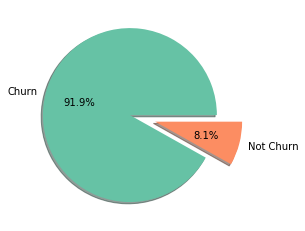

In [32]:
# Churn Rate
#Imbalanced Case
round(final_data.churn.sum()/len(final_data.index)*100,2)

#Let's see how the data is is distributed for classes churn and non-churn

labels = ['Churn','Not Churn']
sizes = [final_data['churn'].value_counts()[0],final_data['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=(0,0.3), labels=labels, shadow=True,autopct='%1.1f%%',colors=sb.color_palette("Set2"))
# ax1.axis('equal')
plt.show()

In [33]:
missing_chk = round((final_data.isna().sum(axis=0)/len(final_data.index))*100,2)
cols_in_doubt = missing_chk[missing_chk>10]
cols_in_doubt#.index


date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_data_8    46.83
total_rech_data_6           44.15
total_rech_data_7           43.15
total_rech_data_8           46.83
max_rech_data_6             44.15
max_rech_data_7             43.15
max_rech_data_8             46.83
count_rech_2g_6             44.15
count_rech_2g_7             43.15
count_rech_2g_8             46.83
count_rech_3g_6             44.15
count_rech_3g_7             43.15
count_rech_3g_8             46.83
av_rech_amt_data_6          44.15
av_rech_amt_data_7          43.15
av_rech_amt_data_8          46.83
arpu_3g_6                   44.15
arpu_3g_7                   43.15
arpu_3g_8                   46.83
arpu_2g_6                   44.15
arpu_2g_7                   43.15
arpu_2g_8                   46.83
night_pck_user_6            44.15
night_pck_user_7            43.15
night_pck_user_8            46.83
fb_user_6                   44.15
fb_user_7                   43.15
fb_user_8     

In [34]:
final_data.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 178 columns):
mobile_number               30001 non-null object
circle_id                   30001 non-null int64
loc_og_t2o_mou              29777 non-null float64
std_og_t2o_mou              29777 non-null float64
loc_ic_t2o_mou              29777 non-null float64
last_date_of_month_6        30001 non-null object
last_date_of_month_7        29974 non-null object
last_date_of_month_8        29836 non-null object
arpu_6                      30001 non-null float64
arpu_7                      30001 non-null float64
arpu_8                      30001 non-null float64
onnet_mou_6                 29456 non-null float64
onnet_mou_7                 29464 non-null float64
onnet_mou_8                 28827 non-null float64
offnet_mou_6                29456 non-null float64
offnet_mou_7                29464 non-null float64
offnet_mou_8                28827 non-null float64
roam_ic_mou_6               2

In [35]:
date_cols = final_data.select_dtypes(exclude=['int64','float']).columns.to_list()
X = date_cols.pop(0)
date_cols
# final_data[date_cols].columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

##### Dropping columns with Dates (no sense found out of these)
##### Dropping columns 'cirle_id' (no information)

In [36]:
final_data.drop(date_cols,axis=1,inplace=True)

final_data.drop('circle_id',axis=1,inplace=True) #Skewd , doesn't contribute to our analysis, nothing unique

In [37]:
final_data.shape

(30001, 168)

In [38]:
missing_chk = round((final_data.isna().sum(axis=0)/len(final_data.index))*100,2)
cols_in_doubt = missing_chk[missing_chk>10]
cols_in_doubt#.index

total_rech_data_6     44.15
total_rech_data_7     43.15
total_rech_data_8     46.83
max_rech_data_6       44.15
max_rech_data_7       43.15
max_rech_data_8       46.83
count_rech_2g_6       44.15
count_rech_2g_7       43.15
count_rech_2g_8       46.83
count_rech_3g_6       44.15
count_rech_3g_7       43.15
count_rech_3g_8       46.83
av_rech_amt_data_6    44.15
av_rech_amt_data_7    43.15
av_rech_amt_data_8    46.83
arpu_3g_6             44.15
arpu_3g_7             43.15
arpu_3g_8             46.83
arpu_2g_6             44.15
arpu_2g_7             43.15
arpu_2g_8             46.83
night_pck_user_6      44.15
night_pck_user_7      43.15
night_pck_user_8      46.83
fb_user_6             44.15
fb_user_7             43.15
fb_user_8             46.83
dtype: float64

#### Imputing below columns with 0 as we don't find any revenue from these user when they used data services

In [39]:

#Imputing missing values with zero as user have not taken/used that services
final_data = final_data.fillna(0)

In [40]:
missing_chk = round((final_data.isna().sum(axis=0)/len(final_data.index))*100,2)
cols_in_doubt = missing_chk[missing_chk>10]
cols_in_doubt#.index

Series([], dtype: float64)

In [41]:
# NO MORE MISSING VALUE
final_data[final_data.isna().any(axis=1)]

Empty DataFrame
Columns: [mobile_number, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, ...]
Index: []

## removing data where data is 100% skewed

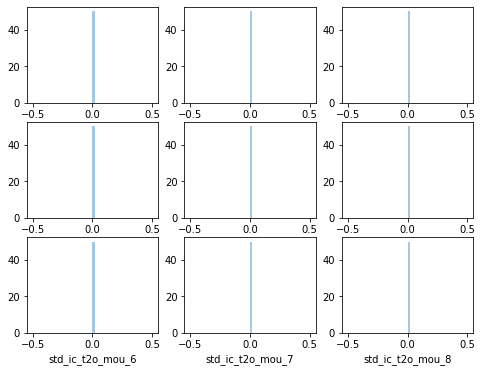

In [42]:
plt.figure(figsize=(8,6))
plt.subplot(3,3,1)
sb.distplot(final_data.loc_og_t2o_mou)

plt.subplot(3,3,2)
sb.distplot(final_data.std_og_t2o_mou)

plt.subplot(3,3,3)
sb.distplot(final_data.loc_ic_t2o_mou)

plt.subplot(3,3,4)
sb.distplot(final_data.std_og_t2c_mou_6)

plt.subplot(3,3,5)
sb.distplot(final_data.std_og_t2c_mou_7)

plt.subplot(3,3,6)
sb.distplot(final_data.std_og_t2c_mou_8)

plt.subplot(3,3,7)
sb.distplot(final_data.std_ic_t2o_mou_6)

plt.subplot(3,3,8)
sb.distplot(final_data.std_ic_t2o_mou_7)

plt.subplot(3,3,9)
sb.distplot(final_data.std_ic_t2o_mou_8)

In [43]:
skewsd_cols = []
for i in final_data.columns:
    if(final_data[i].nunique()==1):
        skewsd_cols.append(i)
#     print(final_data[i].nunique())
skewsd_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [44]:
final_data.drop(skewsd_cols,axis=1,inplace=True)

In [45]:
#columns which tells about informtaion in total
[col for col in final_data.columns if 'total' in col]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_amnt_data_6',
 'total_rech_amnt_data_7',
 'total_rech_amnt_data_8',
 'total_rech_amnt_6',
 'total_rech_amnt_7',
 'total_rech_amnt_8']

Text(0, 0.5, 'total_ic_mou_8')

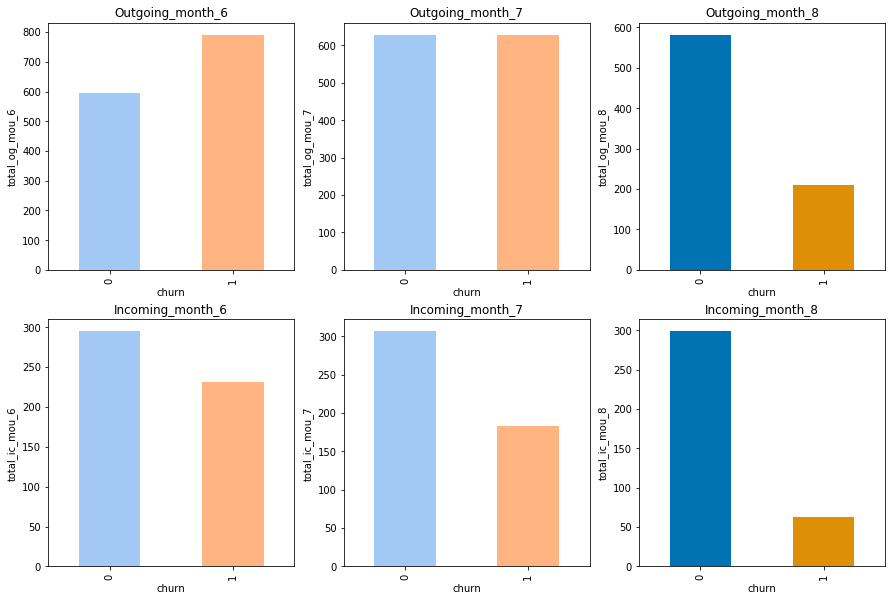

In [46]:
#Let's analize the bahaviour of calls for users in each month
plt.figure(figsize=(15,10))#color=sb.color_palette('deep', 16)
# plt.title('Some')
plt.subplot(2,3,1)
plt.title('Outgoing_month_6')
final_data.groupby('churn').total_og_mou_6.mean().plot.bar(color=sb.color_palette('pastel', 16))
plt.ylabel('total_og_mou_6')

plt.subplot(2,3,2)
plt.title('Outgoing_month_7')
final_data.groupby('churn').total_og_mou_7.mean().plot.bar(color=sb.color_palette('pastel', 16))
plt.ylabel('total_og_mou_7')

plt.subplot(2,3,3)
plt.title('Outgoing_month_8')
final_data.groupby('churn').total_og_mou_8.mean().plot.bar(color=sb.color_palette('colorblind', 16))
plt.ylabel('total_og_mou_8')

#For incoming per month
plt.subplot(2,3,4)
plt.title('Incoming_month_6')
final_data.groupby('churn').total_ic_mou_6.mean().plot.bar(color=sb.color_palette('pastel', 16))
plt.ylabel('total_ic_mou_6')

plt.subplot(2,3,5)
plt.title('Incoming_month_7')
final_data.groupby('churn').total_ic_mou_7.mean().plot.bar(color=sb.color_palette('pastel', 16))
plt.ylabel('total_ic_mou_7')

plt.subplot(2,3,6)
plt.title('Incoming_month_8')
final_data.groupby('churn').total_ic_mou_8.mean().plot.bar(color=sb.color_palette('colorblind', 16))
plt.ylabel('total_ic_mou_8')

#### Analysis  :
In First row we have data for outgoing call mou for each month,<br>
In First row we have data for incoming call mou for each month

AS above visuals show the behaviour that outgoing calls are decreased significantly in month of August for users who have churned.<br>
Similarly incoming calls also keep on decreasing in subsequent months

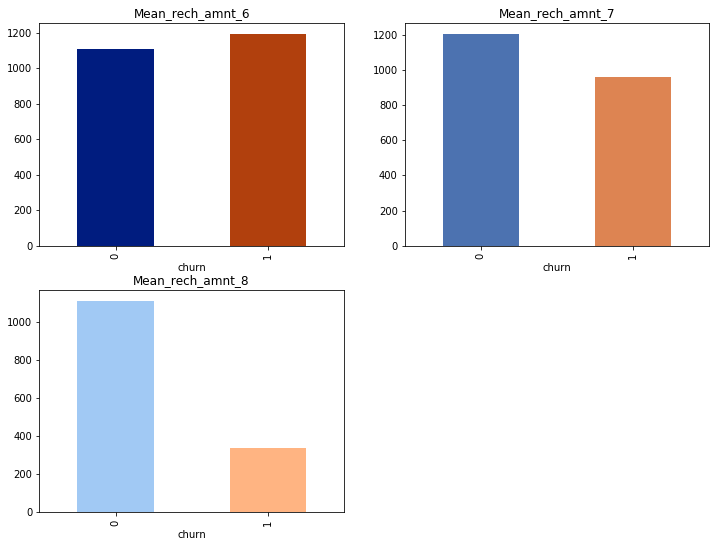

In [47]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.title('Mean_rech_amnt_6')
final_data.groupby('churn').total_rech_amnt_6.mean().plot.bar(color=sb.color_palette('dark', 16))
plt.subplot(2,2,2)
plt.title('Mean_rech_amnt_7')
final_data.groupby('churn').total_rech_amnt_7.mean().plot.bar(color=sb.color_palette('deep', 16))
plt.subplot(2,2,3)
plt.title('Mean_rech_amnt_8')
final_data.groupby('churn').total_rech_amnt_8.mean().plot.bar(color=sb.color_palette('pastel', 16))

#### Analysis  :
Users has done verry less number of recharges in month of August

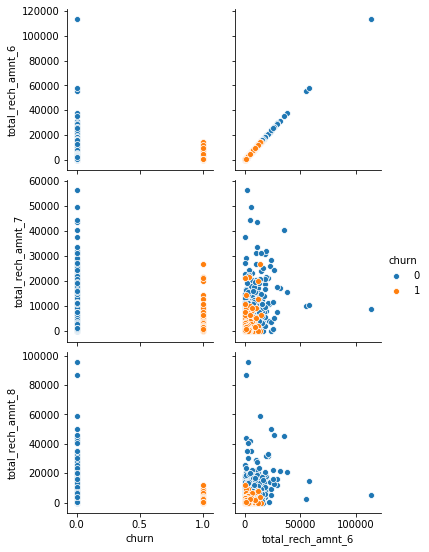

In [48]:
sb.pairplot(final_data,x_vars=['churn','total_rech_amnt_6'],y_vars=['total_rech_amnt_6','total_rech_amnt_7','total_rech_amnt_8'],hue='churn')
# help(sb.pairplot)

#### Analysis :
#### <font color='#black'> Users who have churned (1), are having very less amount of total recharge in each month compared to poeple who have not churned.</font>

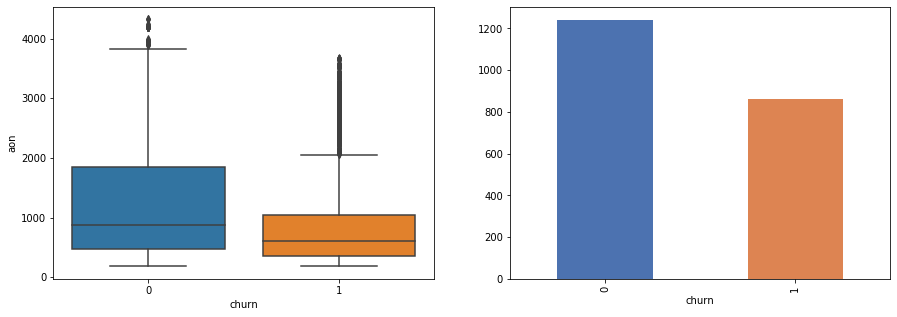

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(x=final_data.churn,y=final_data.aon)

plt.subplot(1,2,2)
# plt.scatter(x=final_data.churn,y=final_data.aon)
final_data.groupby('churn').aon.mean().plot.bar(color=sb.color_palette('deep', 16))

#### Analysis :
Above plots implies that people who have churned were new on our Network (Age On Network) compared to non-churn people.
But the Boxplot says there were some (very less) users who were very old on Network have also churned.


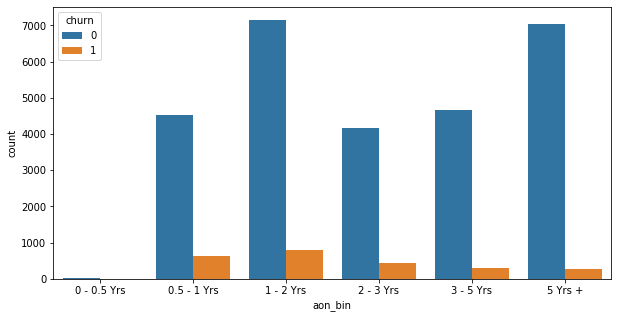

In [50]:
# Write a function to create bins

def convert_aon(aon):
    aon = aon/30
    if(0 < aon <= 6):
        return "0 - 0.5 Yrs"
    elif(6 < aon <= 12):
        return "0.5 - 1 Yrs"
    elif(12 < aon <= 24):
        return "1 - 2 Yrs"
    elif(24 < aon <= 36):
        return "2 - 3 Yrs"
    elif(36 < aon <= 60):
        return "3 - 5 Yrs"
    elif(aon > 60):
        return "5 Yrs +"
    
final_data['aon_bin'] = final_data.apply(lambda x: convert_aon(x['aon']),axis=1)

#Plot countplot to see customer distribution based on AON bin

plt.figure(figsize=(10,5))

sb.countplot(x="aon_bin", data=final_data, hue="churn", order = ['0 - 0.5 Yrs','0.5 - 1 Yrs','1 - 2 Yrs','2 - 3 Yrs','3 - 5 Yrs','5 Yrs +'])

# Drop this bin columns since we are not going to use it

final_data.drop(columns="aon_bin", inplace=True)

## Analysis :
#### It is clear that churn "RATE of CHURN" decreses as customer spends more time with network.

In [51]:
final_data.shape

(30001, 159)

In [52]:
# for i in final_data.columns:
#     print(i)

In [53]:
final_data.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 159 columns):
mobile_number             30001 non-null object
arpu_6                    30001 non-null float64
arpu_7                    30001 non-null float64
arpu_8                    30001 non-null float64
onnet_mou_6               30001 non-null float64
onnet_mou_7               30001 non-null float64
onnet_mou_8               30001 non-null float64
offnet_mou_6              30001 non-null float64
offnet_mou_7              30001 non-null float64
offnet_mou_8              30001 non-null float64
roam_ic_mou_6             30001 non-null float64
roam_ic_mou_7             30001 non-null float64
roam_ic_mou_8             30001 non-null float64
roam_og_mou_6             30001 non-null float64
roam_og_mou_7             30001 non-null float64
roam_og_mou_8             30001 non-null float64
loc_og_t2t_mou_6          30001 non-null float64
loc_og_t2t_mou_7          30001 non-null float64
loc_og_t2

In [54]:
final_data#.head()#.corr()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0        7000842753   197.385   214.816   213.803         0.00         0.00   
7        7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8        7001524846   378.721   492.223   137.362       413.69       351.03   
21       7002124215   514.453   597.753   637.760       102.41       132.11   
23       7000887461    74.350   193.897   366.966        48.96        50.66   
...             ...       ...       ...       ...          ...          ...   
99981    7000630859   384.316   255.405   393.474        78.68        29.04   
99984    7000661676   328.594   202.966   118.707       423.99       181.83   
99986    7001729035   644.973   455.228   564.334       806.73       549.36   
99988    7002111859   312.558   512.932   402.080       199.89       174.46   
99997    7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0             0.00          0.00          0.00          0.00           0.00   
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
21           85.14        757.93        896.68        983.39           0.00   
23           33.58         85.41         89.36        205.89           0.00   
...            ...           ...           ...           ...            ...   
99981       103.24         56.13         28.09         61.44           0.00   
99984         5.71         39.51         39.81         18.26           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00           0.00           0.00   
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0               0.00              0.00              0.00              0.00   
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
21              0.00              4.48              6.16             23.34   
23              0.00             48.96             50.66             33.58   
...              ...               ...               ...               ...   
99981           0.00             72.53             29.04             89.23   
99984           0.00            423.99            181.83              5.71   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
21                

In [55]:
final_data.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    260.793024    267.819295   
std      460.640461    479.776947    501.961981    459.644368    479.993989   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
10%      171.605000    177.886000     84.000000      0.700000      0.580000   
25%      309.865000    309.826000    231.473000     17.080000     16.030000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     234.112539    373.693961    378.103169    335.077044      16.110355   
std      458.448598    482.523558    498.923555    482.062509      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.000000     11.260000     10.430000      2.200000       0.000000   
25%       10.390000     71.610000     69.910000     46.740000       0.000000   
50%       65.610000    222.540000    220.030000    182.790000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
90%      665.080000    895.830000    916.080000    823.680000      27.390000   
95%     1074.590000   1256.610000   1272.290000   1167.540000      84.540000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.642504      12.500551      26.571547      20.152086   
std        75.785903      74.125281     116.205525      96.100428   
min         0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.290000      15.010000      50.430000      31.090000   
95%        55.640000      56.350000     145.410000     104.240000   
99%       280.460000     282.190000     530.710000     438.590000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       19.865615         84.484753         85.674287         78.077112   
std       104.719009        228.794004        240.525999        227.373609   
min         0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.610000          2.530000   
50%         0.000000         24.330000         24.680000         20.730000   
75%         0.000000         77.980000         78.340000         72.040000   
90%        28.880000        187.930000        190.840000        178.840000   
95%       100.510000        322.740000        324.390000        298.780000   
99%       427.030000       1006.360000       1018.530000        913.330000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og

In [56]:
# for_outlier = final_data.copy()
# for_outlier.drop('churn',axis=1,inplace=True)
# for col in for_outlier.columns:
#     for_outlier = for_outlier[for_outlier[col]<=for_outlier[col].quantile(.99)]

In [57]:
final_data.drop('mobile_number',axis=1,inplace=True)

In [58]:
final_data.info() #All numeric 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 158 entries, arpu_6 to churn
dtypes: float64(132), int64(26)
memory usage: 37.6 MB


In [59]:
final_data2 = final_data.copy()
final_data

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       197.385   214.816   213.803         0.00         0.00         0.00   
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
8       378.721   492.223   137.362       413.69       351.03        35.08   
21      514.453   597.753   637.760       102.41       132.11        85.14   
23       74.350   193.897   366.966        48.96        50.66        33.58   
...         ...       ...       ...          ...          ...          ...   
99981   384.316   255.405   393.474        78.68        29.04       103.24   
99984   328.594   202.966   118.707       423.99       181.83         5.71   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00          0.00          0.00           0.00           0.00   
7            453.43        567.16        325.91          16.23          33.49   
8             94.66         80.63        136.48           0.00           0.00   
21           757.93        896.68        983.39           0.00           0.00   
23            85.41         89.36        205.89           0.00           0.00   
...             ...           ...           ...            ...            ...   
99981         56.13         28.09         61.44           0.00           0.00   
99984         39.51         39.81         18.26           0.00           0.00   
99986        784.76        617.13        595.44           0.00           0.00   
99988        175.88        277.01        248.33           0.00           0.00   
99997          0.00          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
7              31.64          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                 51.39             31.38             40.28            308.63   
8                297.13            217.59             12.49             80.96   
21                 4.48              6.16             23.34             91.81   
23                48.96             50.66             33.58             82.94   
...                 ...               ...               ...               ...   
99981             72.53             29.04             89.23             52.21   
99984            423.99            181.83              5.71             17.96   
99986            709.21            496.14            718.56            574.93   
99988            170.28            146.48              2.46            137.83   
99997              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                  0.00              0.00              0.00              0.00   
7                447.38            162.28             62.13             55.14   
8                 70.58             50.54             

## Data Spliting Into Train and Test

In [60]:
df_train,df_test = train_test_split(final_data,train_size=.70,test_size=0.30,random_state=100)

In [61]:
print(df_train.shape)
print(df_test.shape)
# df_test[df_test.churn==1]

(21000, 158)
(9001, 158)


In [62]:
y_train = df_train.pop('churn')
X_train = df_train

In [63]:
y_test = df_test.pop('churn')
X_test = df_test

In [64]:
print(y_train.value_counts())
print(y_test.value_counts())

0    19309
1     1691
Name: churn, dtype: int64
0    8251
1     750
Name: churn, dtype: int64


In [65]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test  : ',X_test.shape)
print('y_test  : ',y_test.shape)

X_train :  (21000, 157)
y_train :  (21000,)
X_test  :  (9001, 157)
y_test  :  (9001,)


## Scaling 

In [66]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [67]:
X_train

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
39186  1.115484  0.688737  0.152667    -0.557530    -0.541565    -0.498528   
39833 -0.096775 -0.500253 -0.275833    -0.252141    -0.454845    -0.420576   
38778 -0.551742 -0.495133 -0.370946    -0.417911    -0.397984    -0.328062   
43026  1.430336 -0.476286  0.364233     4.658430    -0.212796     1.006632   
12271 -0.256450 -0.210469 -0.463214    -0.531335    -0.462941    -0.457129   
...         ...       ...       ...          ...          ...          ...   
40261 -0.618208 -0.768769 -0.546628    -0.235029    -0.394813    -0.351424   
81456  0.118231  0.597509  0.364516     0.558828     1.866930     1.762038   
47136 -0.611299 -1.116700 -0.933549    -0.547218    -0.558843    -0.507460   
77825  1.103122 -0.236727 -0.482515     0.135080    -0.233871    -0.409123   
18732  1.432356  2.023951  1.067727     1.303630     1.558213     0.055095   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
39186     -0.461376     -0.438796     -0.489079       0.166015       0.177751   
39833     -0.109409     -0.302716     -0.143763      -0.211944      -0.168046   
38778     -0.084162     -0.162412     -0.251206       0.019451       0.380352   
43026      0.200074     -0.355665      0.453869      -0.211944       0.347666   
12271     -0.388716     -0.155114     -0.522919      -0.211944      -0.168046   
...             ...           ...           ...            ...            ...   
40261     -0.680418     -0.685036     -0.642598      -0.201373      -0.168046   
81456      0.283423      0.700729      0.462886       1.826501      -0.168046   
47136     -0.712090     -0.750994     -0.669175      -0.211944      -0.168046   
77825      2.629078      0.186017     -0.342678      -0.211944      -0.168046   
18732      2.023132      3.204184      2.656273      -0.211944      -0.168046   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
39186       0.252122      -0.178395      -0.062395      -0.095051   
39833      -0.169673      -0.232413      -0.211540      -0.192132   
38778       0.757842      -0.029826       0.009688       0.562960   
43026       0.139589      -0.232413       0.136016       0.039840   
12271      -0.169673      -0.232413      -0.211540      -0.192132   
...              ...            ...            ...            ...   
40261      -0.169673      -0.217785      -0.211540      -0.192132   
81456      -0.169673       2.013143      -0.211540      -0.192132   
47136      -0.169673      -0.232413      -0.211540      -0.192132   
77825      -0.169673      -0.232413      -0.211540      -0.192132   
18732      -0.169673      -0.232413      -0.211540      -0.192132   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
39186         -0.347750         -0.323913         -0.316741         -0.562058   
39833         -0.090037         -0.228832         -0.162589          0.442672   
38778         -0.277290         -0.306611         -0.223485          0.178420   
43026         -0.190950         -0.220222          2.386623          0.418203   
12271         -0.310709         -0.236417         -0.285928          0.069703   
...                 ...               ...               ...               ...   
40261         -0.256392         -0.181640         -0.200966         -0.588334   
81456         -0.136632          0.663591          0.366137         -0.361238   
47136         -0.325936         -0.354212         -0.334404         -0.523960   
77825          1.011795          0.219962         -0.139941          5.699706   
18732          2.341890          2.558646          0.619348          1.397286   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
39186         -0.545416         -0.560932         -0.227853         -0.290731   
39833          0.066070          0.255949          0.253079         -0.057653   
38778          0.226166         -0.102882         -0.1

## PCA Implementation

In [68]:
# from sklearn.decomposition import PCA

In [69]:
pca = PCA(random_state=60)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=60,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
print(len(pca.components_)) #So we got 157 eigenVectors 
print(len(pca.components_[0]))# each of the eigenvector is having same no. of basis vectors

157
157


In [85]:
pca.explained_variance_ratio_ #Each Components is capturing very less amunt of varience

array([1.17640328e-01, 9.22612240e-02, 6.57158573e-02, 5.59130873e-02,
       3.77559651e-02, 3.35619938e-02, 2.72517475e-02, 2.54740723e-02,
       2.40527504e-02, 2.19170251e-02, 2.14050914e-02, 1.99032164e-02,
       1.84568378e-02, 1.79860128e-02, 1.71152840e-02, 1.68991609e-02,
       1.55648662e-02, 1.50389672e-02, 1.41483579e-02, 1.33150680e-02,
       1.25435418e-02, 1.23629357e-02, 1.13748910e-02, 1.08580692e-02,
       1.04180022e-02, 9.97932015e-03, 9.75282885e-03, 8.95029920e-03,
       8.49944028e-03, 7.97135982e-03, 7.68931897e-03, 7.35093821e-03,
       6.98453819e-03, 6.86362299e-03, 6.59598845e-03, 6.50044319e-03,
       6.11490125e-03, 6.00805163e-03, 5.91484134e-03, 5.81370296e-03,
       5.39201688e-03, 5.34575908e-03, 5.26772670e-03, 5.05076868e-03,
       4.94448706e-03, 4.77423606e-03, 4.56987749e-03, 4.49339048e-03,
       4.30398678e-03, 4.06798879e-03, 4.04277032e-03, 3.88015436e-03,
       3.62852670e-03, 3.57059368e-03, 3.43173943e-03, 3.41169070e-03,
      

In [72]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Screen Plot to find best number of components to choose.

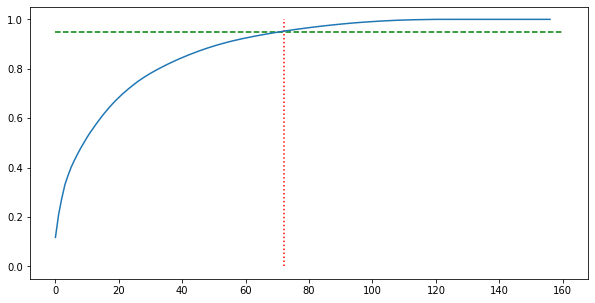

In [86]:
plt.figure(figsize=(10,5))
plt.plot(var_cumu)
plt.hlines(y=.95,xmax=160,xmin=0,colors='g',linestyles='--')
plt.vlines(x=72,ymax=1.0,ymin=0,colors='r',linestyles='dotted')

In [87]:
#Validate 
pca2 = PCA(.95,random_state=100)
pca2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
len(pca2.explained_variance_ratio_) #Validated

72

In [89]:
# 72 Components are best for capturing 95% of variance in our dataset.
# So we have reduced the dimensionality of our dataset from 157 to 75
var_cumu2 = np.cumsum(pca2.explained_variance_ratio_)

In [90]:
pca_final = IncrementalPCA(n_components=72)

In [91]:
# IncrementalPCA?

In [92]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [93]:
print('New PCA Transformed X_train_pca  : ',X_train_pca.shape)
print('Old X_train                      : ',X_train.shape)
print('New PCA Transformed X_test_pca   : ',X_test_pca.shape)
print('Old X_test                       : ',X_test.shape)
print('************************************************************')
print('y_train                          : ',y_train.shape)
print('y_test                           : ',y_test.shape)

New PCA Transformed X_train_pca  :  (21000, 72)
Old X_train                      :  (21000, 157)
New PCA Transformed X_test_pca   :  (9001, 72)
Old X_test                       :  (9001, 157)
************************************************************
y_train                          :  (21000,)
y_test                           :  (9001,)


In [70]:
#Let's check How well PCA tranformed our DataSet

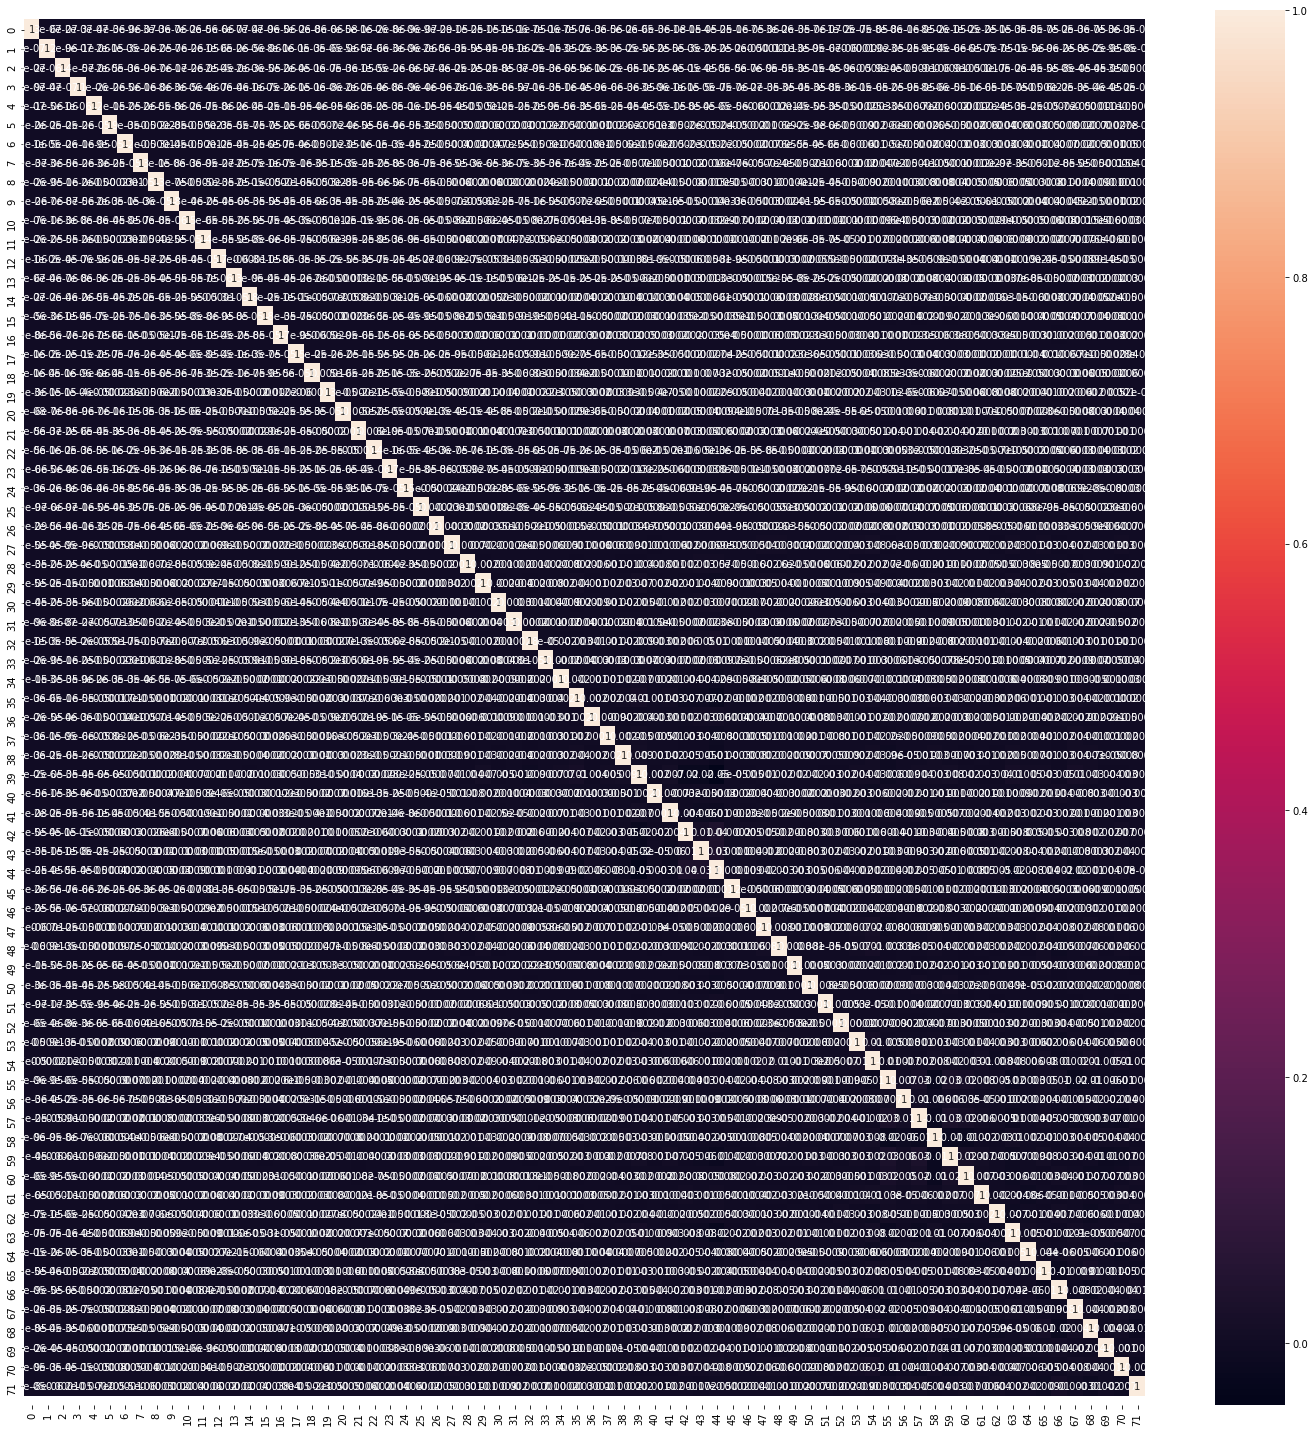

In [83]:
plt.figure(figsize=(20,20))
ax = sb.heatmap(pd.DataFrame(X_train_pca).corr(),annot=True,fmt='.1g') #Gajab
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)
plt.tight_layout()

### Observation from Above Heatmap : 
PCA Transformed data is completely independent/un-correlated



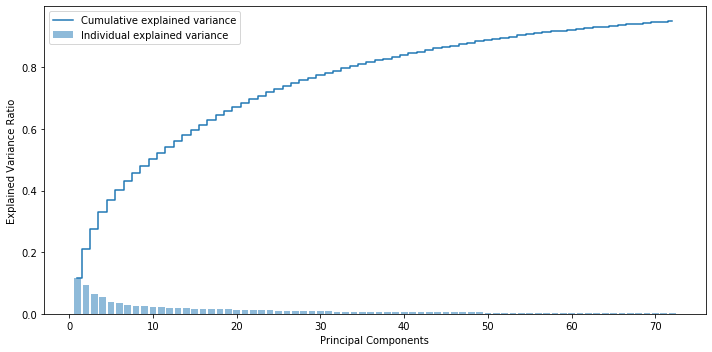

In [334]:
# Contribution of components (out of 72)

plt.figure(figsize=(10 , 5))
plt.bar(range(1, len(pca2.components_) + 1), pca2.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, len(pca2.components_) + 1), var_cumu2, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [335]:
# LogisticRegression?
#Focusing on :
# Churned people have churned correctly (1) but its fine if non-churned user is also predicted as Churned
#False Positive Rate : Low


In [94]:
print(y_train.value_counts())
print(y_test.value_counts())

0    19309
1     1691
Name: churn, dtype: int64
0    8251
1     750
Name: churn, dtype: int64


# Model building on PCs : 


### 1.) Logistics Regression with Class Imbalance Handling

In [95]:
# cost funtion (1-p)*(1-p2)*(1-p3).....(1*pn) * p*p2*p3*pm (positive vale number kam hai to multiplication me  
# where m < n 

In [96]:
#See How Imbalance is this 
final_data.churn.value_counts()

# 1 - Churn 
# 0 - not churn

0    27560
1     2441
Name: churn, dtype: int64

In [97]:
y_test.value_counts()

0    8251
1     750
Name: churn, dtype: int64

In [98]:
#https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b
# keeping it for future reference

### HyperParameter Tuning for Logistgic Regression

In [129]:
# [{0:i,1:100-i} for i in np.linspace(1,99)]

In [98]:
hyper_parameter = {'class_weight' : [{0:i,1:100-i} for i in range(1,100)]}
score= ('recall','precision')
lg = LogisticRegression()
results = GridSearchCV(estimator=lg,
            param_grid= hyper_parameter,
            cv=4,
            scoring= score,
            verbose=1,
            n_jobs = -1,
            refit = 'recall')
results.fit(X_train_pca,y_train)
# GridSearchCV?
# LogisticRegression?

Fitting 4 folds for each of 99 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 99}, {0: 2...
                                          {0: 11, 1: 89}, {0: 12, 1: 88},
                                          {0: 13, 1: 87}, {0: 14, 1: 86},
                                          {0: 15, 1: 85}, {0: 16, 1: 84},
                                          {0: 17, 1: 83}, {0: 18, 

In [104]:
out = pd.DataFrame(results.cv_results_)
# out['S. no'] = range(1,100)
out

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.219164      0.050792         0.011469        0.003347   
1        0.190494      0.016762         0.008225        0.001297   
2        0.257563      0.082363         0.010720        0.002940   
3        0.189746      0.022090         0.008225        0.001636   
4        0.195478      0.019094         0.007977        0.001577   
..            ...           ...              ...             ...   
94       0.236369      0.025950         0.008476        0.001115   
95       0.292220      0.071519         0.011717        0.004014   
96       0.268542      0.056410         0.007719        0.001086   
97       0.245347      0.023811         0.008475        0.002286   
98       0.252079      0.032066         0.008226        0.001781   

   param_class_weight                           params  split0_test_recall  \
0       {0: 1, 1: 99}  {'class_weight': {0: 1, 1: 99}}            0.959716   
1       {0: 2, 1: 98}  {'class_weight': {0: 2, 1: 98}}            0.945498   
2       {0: 3, 1: 97}  {'class_weight': {0: 3, 1: 97}}            0.928910   
3       {0: 4, 1: 96}  {'class_weight': {0: 4, 1: 96}}            0.905213   
4       {0: 5, 1: 95}  {'class_weight': {0: 5, 1: 95}}            0.893365   
..                ...                              ...                 ...   
94      {0: 95, 1: 5}  {'class_weight': {0: 95, 1: 5}}            0.014218   
95      {0: 96, 1: 4}  {'class_weight': {0: 96, 1: 4}}            0.009479   
96      {0: 97, 1: 3}  {'class_weight': {0: 97, 1: 3}}            0.007109   
97      {0: 98, 1: 2}  {'class_weight': {0: 98, 1: 2}}            0.007109   
98      {0: 99, 1: 1}  {'class_weight': {0: 99, 1: 1}}            0.007109   

    split1_test_recall  split2_test_recall  split3_test_recall  \
0             0.969267            0.966903            0.978723   
1             0.936170            0.959811            0.955083   
2             0.917258            0.921986            0.926714   
3             0.900709            0.900709            0.910165   
4             0.872340            0.881797            0.888889   
..                 ...                 ...                 ...   
94            0.007092            0.002364            0.009456   
95            0.004728            0.002364            0.007092   
96            0.002364            0.002364            0.007092   
97            0.002364            0.000000            0.002364   
98            0.000000            0.000000            0.000000   

    mean_test_recall  std_test_recall  rank_test_recall  \
0           0.968652         0.006796                 1   
1           0.949140         0.009092                 2   
2           0.923717         0.004491                 3   
3           0.904199         0.003905                 4   
4           0.884098         0.007943                 5   
..               ...              ...               ...   
94          0.008283         0.004274                95   
95          0.005916         0.002651                96   
96          0.004732         0.002368                97   
97          0.002959         0.002583                98   
98          0.001777         0.003078                99   

    split0_test_precision  split1_test_precision  split2_test_precision  \
0                0.116413               0.111656               0.112641   
1                0.143836               0.139388               0.141316   
2                0.166738               0.166667               0.164349   
3                0.187992               0.190500               0.187316   
4                0.211441               0.213665               0.209315   
..                    ...                    ...                    ...   
94               0.857143               0.750000               0.500000   
95               0.800000               0.666667               0.500000   
96               0.750000               1.000000               0.500000  

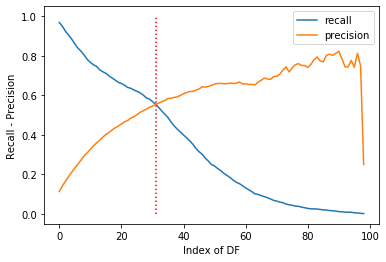

In [105]:
plt.plot(out.index,out.mean_test_recall)
plt.plot(out.index,out.mean_test_precision)
plt.xlabel('Index of DF')
plt.ylabel('Recall - Precision')
plt.legend(['recall','precision'])
# plt.hlines(y=.56,xmax=100,xmin=0,colors='g',linestyles='--')
plt.vlines(x=31,ymax=1.0,ymin=0,colors='r',linestyles='dotted')

In [106]:
# out[out.param_class_weight=={0:8, 1: 92}]
out.iloc[29:34,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
29       0.244349      0.076570         0.008226        0.002160   
30       0.262301      0.055678         0.012215        0.004195   
31       0.257062      0.043401         0.009975        0.003235   
32       0.340088      0.057339         0.011968        0.001409   
33       0.323133      0.073732         0.012221        0.002161   

   param_class_weight                            params  split0_test_recall  \
29     {0: 30, 1: 70}  {'class_weight': {0: 30, 1: 70}}            0.578199   
30     {0: 31, 1: 69}  {'class_weight': {0: 31, 1: 69}}            0.563981   
31     {0: 32, 1: 68}  {'class_weight': {0: 32, 1: 68}}            0.554502   
32     {0: 33, 1: 67}  {'class_weight': {0: 33, 1: 67}}            0.537915   
33     {0: 34, 1: 66}  {'class_weight': {0: 34, 1: 66}}            0.521327   

    split1_test_recall  split2_test_recall  split3_test_recall  \
29            0.560284            0.581560            0.602837   
30            0.553191            0.567376            0.588652   
31            0.543735            0.543735            0.576832   
32            0.534279            0.522459            0.557920   
33            0.524823            0.503546            0.534279   

    mean_test_recall  std_test_recall  rank_test_recall  \
29          0.580720         0.015115                30   
30          0.568300         0.012865                31   
31          0.554701         0.013512                32   
32          0.538143         0.012768                33   
33          0.520994         0.011132                34   

    split0_test_precision  split1_test_precision  split2_test_precision  \
29               0.526998               0.537415               0.562929   
30               0.532438               0.544186               0.564706   
31               0.542923               0.554217               0.566502   
32               0.549637               0.567839               0.568123   
33               0.555556               0.569231               0.581967   

    split3_test_precision  mean_test_precision  std_test_precision  \
29               0.530146             0.539372            0.014116   
30               0.538961             0.545073            0.012075   
31               0.547085             0.552682            0.008943   
32               0.556604             0.560551            0.007829   
33               0.565000             0.567938            0.009493   

    rank_test_precision  
29                   69  
30                   68  
31                   67  
32                   66  
33                   65

In [99]:
#Checking the Hyperparameter Performace

logreg = LogisticRegression(class_weight={0: 32, 1: 68})
logreg.fit(X_train_pca,y_train)
y_test_pred = logreg.predict(X_test_pca)
y_test_pred_prob = logreg.predict_proba(X_test_pca)
print(classification_report(y_test,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))
# accuracy_score
C_M = confusion_matrix(y_test,y_test_pred)
C_M

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8251
           1       0.58      0.59      0.58       750

    accuracy                           0.93      9001
   macro avg       0.77      0.77      0.77      9001
weighted avg       0.93      0.93      0.93      9001
 


OverAll Accuracy of Model: 0.930785468281302


array([[7939,  312],
       [ 311,  439]], dtype=int64)

In [136]:
# #Without Class Imbalance / without Hyperparameter

# logreg = LogisticRegression()
# logreg.fit(X_train_pca,y_train)

In [100]:
#Precision will be low with this hyperparameter and we are ok with it.
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(logreg,X_test_pca,y_test)
logreg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

### Evaluaion on Test Set:

In [101]:
y_test_pred = logreg.predict(X_test_pca)
y_test_pred_prob = logreg.predict_proba(X_test_pca)

In [102]:
# GridSearchCV?
# y_test_pred_prob

In [103]:
#In Default case predict() with predict labels bybtakeing cut off as 0.5 

print("y_test_predicted_labels:\n",y_test_pred,'\n')
print("y_test_predicetd_probabilities:\n\n",y_test_pred_prob)

y_test_predicted_labels:
 [1 0 0 ... 0 0 0] 

y_test_predicetd_probabilities:

 [[0.31651751 0.68348249]
 [0.51978497 0.48021503]
 [0.9069611  0.0930389 ]
 ...
 [0.99865401 0.00134599]
 [0.65269099 0.34730901]
 [0.82517648 0.17482352]]


##### Let's check if .5 cutoff is good for us or need to take other than .05

In [104]:
Results = pd.DataFrame({'Actual Churn': y_test,'Predicted Probabilities of Churn (1)':y_test_pred_prob[:,1],'Predicted_Churn--Default_.05': y_test_pred})

Results[Results['Actual Churn']!=Results['Predicted_Churn--Default_.05']].head(3) #1612

Actual Churn  Predicted Probabilities of Churn (1)  \
8279              1                              0.480215   
37891             0                              0.508057   
96352             0                              0.564330   

       Predicted_Churn--Default_.05  
8279                              0  
37891                             1  
96352                             1

In [105]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Results[i]= Results['Predicted Probabilities of Churn (1)'].map(lambda x: 1 if x > i else 0)
Results.head()

Actual Churn  Predicted Probabilities of Churn (1)  \
20296             1                              0.683482   
8279              1                              0.480215   
72269             0                              0.093039   
65602             0                              0.330768   
42758             1                              0.867083   

       Predicted_Churn--Default_.05  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
20296                             1    1    1    1    1    1    1    1    0   
8279                              0    1    1    1    1    1    0    0    0   
72269                             0    1    0    0    0    0    0    0    0   
65602                             0    1    1    1    1    0    0    0    0   
42758                             1    1    1    1    1    1    1    1    1   

       0.8  0.9  
20296    0    0  
8279     0    0  
72269    0    0  
65602    0    0  
42758    1    0

In [106]:
# Results['Predicted_Churn--Default_.05'] == Results['0.5']

In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','f1'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(Results['Actual Churn'], Results[i] )
    f1 = f1_score(Results['Actual Churn'], Results[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,f1]
print(cutoff_df)

     prob  accuracy     sensi     speci        f1
0.0   0.0  0.083324  1.000000  0.000000  0.153830
0.1   0.1  0.410732  0.966667  0.360199  0.214688
0.2   0.2  0.563937  0.938667  0.529875  0.264017
0.3   0.3  0.673592  0.905333  0.652527  0.316108
0.4   0.4  0.755805  0.865333  0.745849  0.371281
0.5   0.5  0.820909  0.821333  0.820870  0.433193
0.6   0.6  0.873570  0.786667  0.881469  0.509060
0.7   0.7  0.904011  0.709333  0.921706  0.551867
0.8   0.8  0.925897  0.592000  0.956248  0.571061
0.9   0.9  0.927008  0.281333  0.985699  0.391103


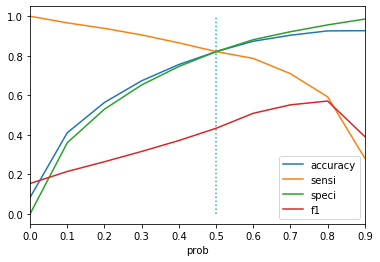

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','f1'])
plt.vlines(x=.50,ymax=1.0,ymin=0,colors='c',linestyles='dotted')
plt.show()

### Obervation :
.5 is good and well as cutoff in this case and goinf with that only

In [109]:
print(classification_report(y_test,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))
# accuracy_score

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8251
           1       0.29      0.82      0.43       750

    accuracy                           0.82      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.92      0.82      0.86      9001
 


OverAll Accuracy of Model: 0.8209087879124541


In [185]:
# classification_report?

In [186]:
# #Accuracy
# (C_M[0,0]+C_M[1,1])/(C_M[0,0]+C_M[0,1]+C_M[1,0]+C_M[1,1])

In [110]:
C_M = confusion_matrix(y_test,y_test_pred)
C_M #134+1478 = 1612 (compare with above dataframe)

array([[6773, 1478],
       [ 134,  616]], dtype=int64)

In [262]:
# print('roc_auc_score without Class Imabalance Handling : ',roc_auc_score(y_true=y_test,y_score=y_test_pred_prob[:,1]))
# #0.8933656526481637

In [111]:
print(roc_auc_score(y_true=y_test,y_score=y_test_pred))

0.8211017654425727


In [135]:
# Sensitivity_without_class_imbalance_handling = C_M[1,1]/(C_M[1,1]+C_M[1,0])
# print('Sensitivity_without_class_imbalance_handling :', Sensitivity_without_class_imbalance_handling) 
# #0.2826666666666667

# print('\n***********************************************\n')

# Specificity_without_class_imbalance_handing = (C_M[0,0])/(C_M[0,0]+C_M[0,1])
# print('Specificity_without_class_imbalance_handing :', Specificity_without_class_imbalance_handing)
# #0.9886074415222398

Sensitivity_without_class_imbalance_handling : 0.2826666666666667

***********************************************

Specificity_without_class_imbalance_handing : 0.9886074415222398


#### Analysis :
Sensitivity/True Positive Rate is not good when class imbalane not handled : 0.2826666666666667<br>
Specificity/True Negative Rate is good this time                           : 0.9886074415222398<br>
Because almost every datapoints are labeled as 0<br>

In [112]:
Sensitivity_with_class_imbalance_handling = C_M[1,1]/(C_M[1,1]+C_M[1,0])
print('Sensitivity_with_class_imbalance_handling :', Sensitivity_with_class_imbalance_handling) 

print('\n***********************************************\n')

Specificity_with_class_imbalance_handing = (C_M[0,0])/(C_M[0,0]+C_M[0,1])
print('Specificity_with_class_imbalance_handing :', Specificity_with_class_imbalance_handing)

Sensitivity_with_class_imbalance_handling : 0.8213333333333334

***********************************************

Specificity_with_class_imbalance_handing : 0.8208701975518119


#### Analysis :
Sensitivity/True Positive Rate is good when class imbalane is handled : 0.8213333333333334 (increased)<br>
Specificity/True Negative Rate is also good                           : 0.8208701975518119<br>

We have acheived both metric to a good number by handling Class Imbalance in Logistics Regression

In [308]:
# #false postive rate - predicting churn when customer does not have churned - can compromise with this
# False_Positive_Rate = C_M[0,1]/(C_M[0,0]+C_M[0,1])
# print('False_Positive_Rate_without_class_imbalance_handling :', False_Positive_Rate) #0.011392558477760271

# print('\n**************************************************************************************\n')

# #More Focus is on False_Negative Rate as churned people should not be predicted as non-churned
# False_Negative_Rate = C_M[1,0]/(C_M[1,1]+C_M[1,0])
# print('False_Negative_Rate_without_class_imbalance_handling :', False_Negative_Rate)#0.7173333333333334

False_Positive_Rate_without_class_imbalance_handling : 0.011392558477760271

**************************************************************************************

False_Negative_Rate_without_class_imbalance_handling : 0.7173333333333334


In [113]:
#false postive rate - predicting churn when customer does not have churned
False_Positive_Rate = C_M[0,1]/(C_M[0,0]+C_M[0,1])
print('False_Positive_Rate_with_class_imbalance_handling :', False_Positive_Rate)#0.1791298024481881
#is too less which is good
print('\n**************************************************************************************\n')
False_Negative_Rate = C_M[1,0]/(C_M[1,1]+C_M[1,0])
print('False_Negative_Rate_with_class_imbalance_handling :', False_Negative_Rate)#0.17866666666666667

False_Positive_Rate_with_class_imbalance_handling : 0.1791298024481881

**************************************************************************************

False_Negative_Rate_with_class_imbalance_handling : 0.17866666666666667


### Explaination : 
We are focusing on Sensitivity (How many actual +ive are predicted as +ive by our model) because we want to predict chured as chured (1), we are okay to compromise with users non-churn as churned.<br><br>
Also focused on False_Negative_Rate as we want to minimize the error of predicting churned users(+ive) as non-churned(-ive)

In [154]:
# roc_curve(y_test,y_test_pred)

In [155]:
# help(roc_curve)

### Plotting Roc Curve

In [114]:
fpr , tpr, threshold = roc_curve(y_test,y_test_pred_prob[:,1])
auc_score = roc_auc_score(y_test,y_test_pred)

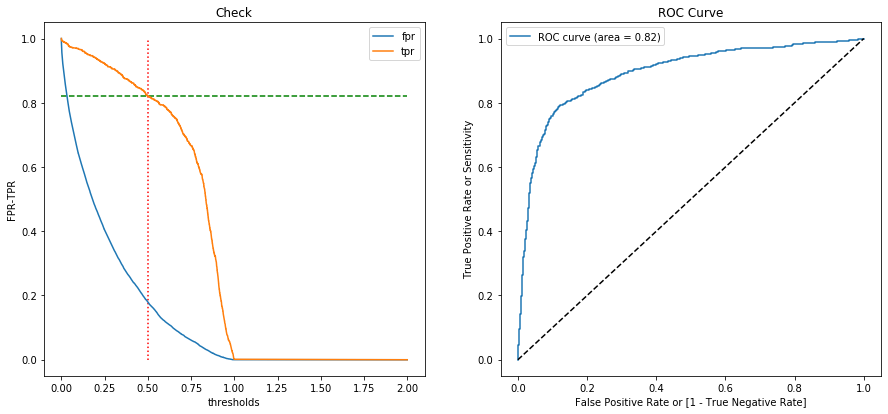

In [115]:
plt.figure(figsize=(15,6.5))

plt.subplot(1,2,1)
plt.title('Check')
plt.plot(threshold,fpr)
plt.plot(threshold,tpr)
plt.xlabel('thresholds')
plt.ylabel('FPR-TPR')
plt.hlines(y=.82,xmax=2.00,xmin=0,colors='g',linestyles='--')
plt.vlines(x=.50,ymax=1.0,ymin=0,colors='r',linestyles='dotted')
plt.legend(['fpr','tpr'])

plt.subplot(1,2,2)
plt.title('ROC Curve')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate or Sensitivity')
plt.legend()

#Threshold = .50, we have false +ive rate as low compared to True +ive Rate which is desirable

In [117]:
#checking if .57 work
# Results

In [118]:
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred_prob[:,1])

Text(0, 0.5, 'Recall')

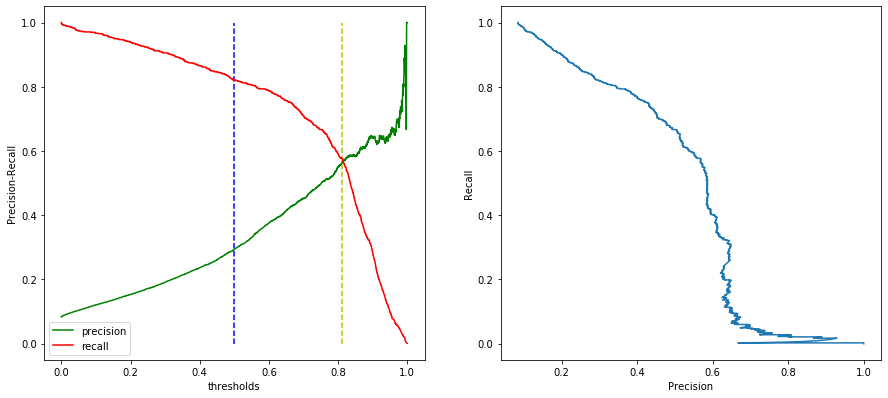

In [119]:
plt.figure(figsize=(15,6.5))

plt.subplot(1,2,1)
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
plt.vlines(x=.81,ymax=1.0,ymin=0,colors='y',linestyles='--')
plt.vlines(x=.50,ymax=1.0,ymin=0,colors='b',linestyles='--')

plt.subplot(1,2,2)
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
# plt.legend()


Above Left Graphical Representation says 0.8 cutoff wlould be better if we want to precision==recall but we are ready to compromise with precision and taking care of recall.
After 0.5 Recall is decreasing rapidly.


False +ive Rate  propotional to   True +ive rate



# Logistic Regression END__

In [134]:
final_data.shape

(30001, 158)

In [121]:
print('New PCA Transformed X_train : ',X_train_pca.shape)
print('y_train                     : ',y_train.shape)
print('New PCA Transformed X_test  : ',X_test_pca.shape)
print('y_test                      : ',y_test.shape)

New PCA Transformed X_train :  (21000, 72)
y_train                     :  (21000,)
New PCA Transformed X_test  :  (9001, 72)
y_test                      :  (9001,)


## 2). Random Forest _ PCA with Class Imbalance Handling

In [215]:
# Random Forest is immune to curse of Dimentionality , we can take entire non-pcs dataset also
# Random Forest doesn't assume anything about data thus outliers can be handled.
# This applies on any Tree Model

#### <font color='color'> Do NOT RUN AGAIN </font>

In [106]:
hyperparameter = {'n_estimators' : [200,500],
                  'max_depth': range(3,11),
                  'max_features' : range(3,13),
                  'min_samples_split' : range(100,301,100),
                  'min_samples_leaf' : range(50,251,50),
                  }

# hyperparameter = {'n_estimators' : [200,500],
#                   'max_depth': range(2,5),
#                   'max_features' : range(3,5),
#                   'min_samples_split' : range(100,200,50),
#                   'min_samples_leaf' : range(50,150,50),
#                   } #5.4 min

rf = RandomForestClassifier(class_weight='balanced')

rf_model = GridSearchCV(estimator=rf,
                        param_grid=hyperparameter,
                        scoring='accuracy',
                        cv=2,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True
                       )

rf_model.fit(X_train_pca,y_train)

Fitting 2 folds for each of 2400 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 62.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 113.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 190.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 275.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 359.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 678.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 782.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [107]:
rf_model.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 500}

In [108]:
result = pd.DataFrame(rf_model.cv_results_)
result.shape

(2400, 19)

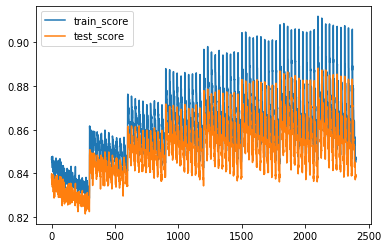

In [113]:
plt.plot(result.index,result.mean_train_score)
plt.plot(result.index,result.mean_test_score)
plt.legend(['train_score','test_score'])

In [172]:
rf_model.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 500}

In [122]:
rf = RandomForestClassifier(bootstrap = True,
                            n_estimators=500,
                            max_depth=5,
                            max_features = 6,
                            min_samples_split = 200,
                            min_samples_leaf = 100,
                            n_jobs= -1,
                            class_weight='balanced',
                            random_state=100)
rf.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [123]:
# y_train_pred = rf.predict(X_train_pca)

# print(classification_report(y_train,y_train_pred))

In [124]:
y_test_pred = rf.predict(X_test_pca)
y_test_pred_prob = rf.predict_proba(X_test_pca)

In [125]:
print(classification_report(y_test,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))
# accuracy_score

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8251
           1       0.33      0.77      0.46       750

    accuracy                           0.85      9001
   macro avg       0.65      0.82      0.69      9001
weighted avg       0.92      0.85      0.88      9001
 


OverAll Accuracy of Model: 0.8503499611154316


In [126]:
C_M = confusion_matrix(y_test,y_test_pred)
C_M 

array([[7074, 1177],
       [ 170,  580]], dtype=int64)

In [177]:
# len(rf.feature_importances_)

In [127]:
print('Precision :',metrics.precision_score(y_test,y_test_pred))

print('Recall :',metrics.recall_score(y_test,y_test_pred))

Precision : 0.3301081388730791
Recall : 0.7733333333333333


In [128]:
Sensitivity_with_class_imbalance_handling = C_M[1,1]/(C_M[1,1]+C_M[1,0])
print('Sensitivity_with_class_imbalance_handling :', Sensitivity_with_class_imbalance_handling) 

print('\n***********************************************\n')

Specificity_with_class_imbalance_handing = (C_M[0,0])/(C_M[0,0]+C_M[0,1])
print('Specificity_with_class_imbalance_handing :', Specificity_with_class_imbalance_handing)

Sensitivity_with_class_imbalance_handling : 0.7733333333333333

***********************************************

Specificity_with_class_imbalance_handing : 0.8573506241667677


In [129]:
#false postive rate - predicting churn when customer does not have churned
False_Positive_Rate = C_M[0,1]/(C_M[0,0]+C_M[0,1])
print('False_Positive_Rate_with_class_imbalance_handling :', False_Positive_Rate)#0.1791298024481881
#is too less which is good
print('\n**************************************************************************************\n')
False_Negative_Rate = C_M[1,0]/(C_M[1,1]+C_M[1,0])
print('False_Negative_Rate_with_class_imbalance_handling :', False_Negative_Rate)#0.17866666666666667

False_Positive_Rate_with_class_imbalance_handling : 0.14264937583323234

**************************************************************************************

False_Negative_Rate_with_class_imbalance_handling : 0.22666666666666666


Text(0, 0.5, 'Precision-Recall')

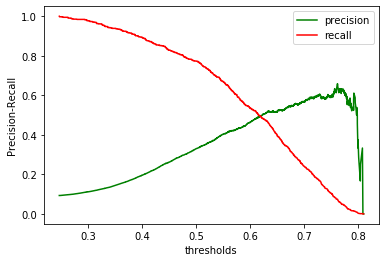

In [130]:
p , r, th = precision_recall_curve(y_test,y_test_pred_prob[:,1])

# plt.figure(figsize=(15,6.5))

plt.plot(th, p[:-1], "g-")
plt.plot(th, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
# plt.vlines(x=.62,ymax=1.0,ymin=0,colors='y',linestyles='--')
# plt.vlines(x=.50,ymax=1.0,ymin=0,colors='b',linestyles='--')



## Random Forest_PCA END_

In [131]:
final_data.shape

(30001, 158)

In [135]:
print('New PCA Transformed X_train : ',X_train_pca.shape)
print('y_train                     : ',y_train.shape)
print('New PCA Transformed X_test  : ',X_test_pca.shape)
print('y_test                      : ',y_test.shape)

New PCA Transformed X_train :  (21000, 72)
y_train                     :  (21000,)
New PCA Transformed X_test  :  (9001, 72)
y_test                      :  (9001,)


In [136]:
X_train.shape

(21000, 157)

## 3). Boosting _ PCA, AdaBoost with Class Imbalance Handling

In [137]:
# AdaBoostClassifier?

In [621]:
# # #base_estimators = Default (DT with depth=1)
# adb = AdaBoostClassifier(n_estimators=1000,random_state=100)
# adb.fit(X_train_pca,y_train)

In [622]:
# # np.linspace(0.1,2,20)
# y_test_pred = adb_final.predict(X_test_pca)
# print(classification_report(y_test,y_test_pred),'\n\n') 
# print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))
# # accuracy_score

#### <font color='color'> Do NOT RUN AGAIN </font>

In [582]:
hyper_para_ada = {'base_estimator__max_depth': [1,2],
                  'n_estimators' : range(100,501,100),
                  'learning_rate' : np.linspace(0.1,2,20)
                  }

dt = DecisionTreeClassifier(class_weight='balanced')
adb = AdaBoostClassifier(base_estimator=dt)

adb_grid = GridSearchCV(estimator=adb,
                        param_grid=hyper_para_ada,
                        cv=2,
                        scoring=['recall','precision'],
                        verbose=1,
                        n_jobs = -1,
                        refit='recall',
                        return_train_score=True
                        )
adb_grid.fit(X_train_pca,y_train)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 89.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 245.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_lea

In [583]:
adb_grid.best_params_

{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 200}

In [590]:
re = pd.DataFrame(adb_grid.cv_results_)
re = re[re.param_base_estimator__max_depth==1]
re[re.param_learning_rate==.2]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      36.315544      0.126367         1.374132        0.055268   
6      70.075607      0.426356         2.792041        0.048229   
7     103.128600      0.045165         4.140384        0.032240   
8     136.719550      0.103644         5.266742        0.067843   
9     171.236076      0.249224         7.218403        0.020187   

  param_base_estimator__max_depth param_learning_rate param_n_estimators  \
5                               1                 0.2                100   
6                               1                 0.2                200   
7                               1                 0.2                300   
8                               1                 0.2                400   
9                               1                 0.2                500   

                                              params  split0_test_recall  \
5  {'base_estimator__max_depth': 1, 'learning_rat...            0.751479   
6  {'base_estimator__max_depth': 1, 'learning_rat...            0.758580   
7  {'base_estimator__max_depth': 1, 'learning_rat...            0.750296   
8  {'base_estimator__max_depth': 1, 'learning_rat...            0.743195   
9  {'base_estimator__max_depth': 1, 'learning_rat...            0.737278   

   split1_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
5            0.776596          0.764038         0.012558                 8   
6            0.788416          0.773498         0.014918                 1   
7            0.776596          0.763446         0.013150                 9   
8            0.763593          0.753394         0.010199                15   
9            0.761229          0.749254         0.011976                18   

   split0_train_recall  split1_train_recall  mean_train_recall  \
5             0.819149             0.820118           0.819634   
6             0.834515             0.839053           0.836784   
7             0.852246             0.850888           0.851567   
8             0.855792             0.857988           0.856890   
9             0.869976             0.871006           0.870491   

   std_train_recall  split0_test_precision  split1_test_precision  \
5          0.000485               0.279613               0.277098   
6          0.002269               0.299813               0.300180   
7          0.000679               0.306280               0.308306   
8          0.001098               0.311353               0.310577   
9          0.000515               0.320803               0.316306   

   mean_test_precision  std_test_precision  rank_test_precision  \
5             0.278355            0.001257                  183   
6             0.299996            0.000184                  157   
7             0.307293            0.001013                  152   
8             0.310965            0.000388                  150   
9             0.318555            0.002248                  136   

   split0_train_precision  split1_train_precision  mean_train_precision  \
5                0.298193                0.297170              0.297681   
6                0.322080                0.317510              0.319795   
7                0.340255                0.332102              0.336178   
8                0.352999                0.344091              0.348545   
9                0.367816                0.355899              0.361858   

   std_train_precision  
5             0.000511  
6             0.002285  
7             0.004077  
8             0.004454  
9             0.005958

In [604]:
# re.iloc[10:15]

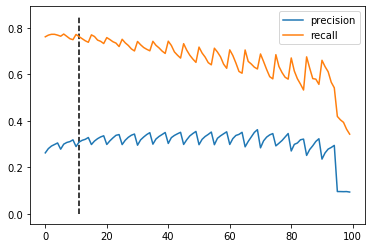

In [595]:
plt.plot(re.index,re.mean_test_precision)
plt.plot(re.index,re.mean_test_recall)
plt.vlines(x=11,ymax=0.85,ymin=0,colors='g',linestyles='--')
plt.legend(['precision','recall'])

In [138]:
dt = DecisionTreeClassifier(max_depth=1,class_weight='balanced')

adb_final = AdaBoostClassifier(n_estimators=200,
                               base_estimator=dt,
                               learning_rate=0.2,
                              )
adb_final.fit(X_train_pca,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [139]:
y_test_pred = adb_final.predict(X_test_pca)
y_test_pred_prob = adb_final.predict_proba(X_test_pca)

In [140]:
print(classification_report(y_test,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))
# accuracy_score

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8251
           1       0.32      0.81      0.46       750

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.92      0.84      0.87      9001
 


OverAll Accuracy of Model: 0.8410176647039218


In [141]:
C_M = confusion_matrix(y_test,y_test_pred)
C_M 

array([[6966, 1285],
       [ 146,  604]], dtype=int64)

In [142]:
print('Precision :',metrics.precision_score(y_test,y_test_pred))

print('Recall :',metrics.recall_score(y_test,y_test_pred))

Precision : 0.3197458973001588
Recall : 0.8053333333333333


In [143]:
Sensitivity_with_class_imbalance_handling = C_M[1,1]/(C_M[1,1]+C_M[1,0])
print('Sensitivity_with_class_imbalance_handling :', Sensitivity_with_class_imbalance_handling) 

print('\n***********************************************\n')

Specificity_with_class_imbalance_handing = (C_M[0,0])/(C_M[0,0]+C_M[0,1])
print('Specificity_with_class_imbalance_handing :', Specificity_with_class_imbalance_handing)

Sensitivity_with_class_imbalance_handling : 0.8053333333333333

***********************************************

Specificity_with_class_imbalance_handing : 0.8442613016604048


In [144]:
#false postive rate - predicting churn when customer does not have churned
False_Positive_Rate = C_M[0,1]/(C_M[0,0]+C_M[0,1])
print('False_Positive_Rate_with_class_imbalance_handling :', False_Positive_Rate)#0.1791298024481881
#is too less which is good
print('\n**************************************************************************************\n')
False_Negative_Rate = C_M[1,0]/(C_M[1,1]+C_M[1,0])
print('False_Negative_Rate_with_class_imbalance_handling :', False_Negative_Rate)#0.17866666666666667

False_Positive_Rate_with_class_imbalance_handling : 0.1557386983395952

**************************************************************************************

False_Negative_Rate_with_class_imbalance_handling : 0.19466666666666665


Text(0, 0.5, 'Precision-Recall')

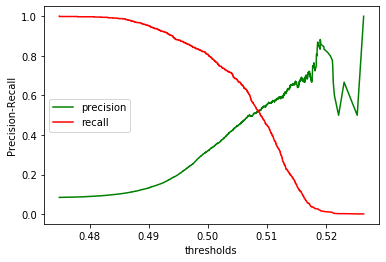

In [145]:
pr , re, th = precision_recall_curve(y_test,y_test_pred_prob[:,1])

# plt.figure(figsize=(15,6.5))

plt.plot(th, pr[:-1], "g-")
plt.plot(th, re[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
# plt.vlines(x=.62,ymax=1.0,ymin=0,colors='y',linestyles='--')
# plt.vlines(x=.50,ymax=1.0,ymin=0,colors='b',linestyles='--')



## AdaBoost_PCA END_

In [146]:
# DecisionTreeClassifier?

In [147]:
print('New PCA Transformed X_train : ',X_train_pca.shape)
print('y_train                     : ',y_train.shape)
print('New PCA Transformed X_test  : ',X_test_pca.shape)
print('y_test                      : ',y_test.shape)

New PCA Transformed X_train :  (21000, 72)
y_train                     :  (21000,)
New PCA Transformed X_test  :  (9001, 72)
y_test                      :  (9001,)


## 4). Gradient Boosting_PCA with Class Imbalance Handling

In [148]:
# GradientBoostingClassifier?

### SMOTE Sampling (Handle Class Imbalance)

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [149]:
# Oversample and plot imbalanced dataset with SMOTE

counter = Counter(y_train)
print("{} {}".format("Before handling class imbalance : ",counter))
# transform the dataset
oversample = SMOTE()
X_train_pca__gr, y_train__gr = oversample.fit_resample(X_train_pca, y_train)
# summarize the new class distribution
counter = Counter(y_train__gr)
print("{} {}".format("After handling class imbalance : ",counter))

Before handling class imbalance :  Counter({0: 19309, 1: 1691})
After handling class imbalance :  Counter({0: 19309, 1: 19309})


In [150]:
print('New PCA Transformed X_train_pca_ : ',X_train_pca__gr.shape)
print('y_train_                     : ',y_train__gr.shape)
print('New PCA Transformed X_test  : ',X_test_pca.shape)
print('y_test                      : ',y_test.shape)

New PCA Transformed X_train_pca_ :  (38618, 72)
y_train_                     :  (38618,)
New PCA Transformed X_test  :  (9001, 72)
y_test                      :  (9001,)


In [151]:
##### We have balanced the Train data set using SMOTE

In [152]:
#learning rate is the hyperparameter
lr_list = [0.05, 0.075,0.01,0.001,0.0001, 0.1, 0.25, 0.5, 0.75, 1]

hyperparameters_table=[]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_pca__gr, y_train__gr)
    accuracy_training=round(gb_clf.score(X_train_pca__gr, y_train__gr),2)
    accuracy_validation=round(gb_clf.score(X_test_pca, y_test),2)
    hyperparameters_table.append([learning_rate,accuracy_training,accuracy_validation])

hyper_param_df=pd.DataFrame(hyperparameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

index  learning_rate  training_accuracy  validaton_accuracy
0      0         0.0500               0.83                0.83
1      1         0.0750               0.84                0.84
2      2         0.0100               0.80                0.79
3      3         0.0010               0.79                0.78
4      4         0.0001               0.79                0.78
5      5         0.1000               0.85                0.84
6      6         0.2500               0.87                0.85
7      7         0.5000               0.88                0.85
8      8         0.7500               0.89                0.85
9      9         1.0000               0.90                0.85

In [153]:
gb_clf = GradientBoostingClassifier(n_estimators=200, 
                                    learning_rate=0.25, 
                                    max_features=2, 
                                    max_depth=1,
                                    random_state=0)
 

gb_clf.fit(X_train_pca__gr, y_train__gr)

#fitting decision tree on the train dataset
y_train_pred=gb_clf.predict(X_train_pca__gr)

#fitting logistic model on the test dataset
y_test_pred=gb_clf.predict(X_test_pca)

#training dataset
print(' Train data accuracy metrics are ')
print(classification_report(y_train__gr,y_train_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_train__gr,y_train_pred))

#testing dataset
print('\n##################################################\n')
print(' Test data accuracy metrics are ')
print(classification_report(y_test,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test,y_test_pred))

 Train data accuracy metrics are 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19309
           1       0.84      0.84      0.84     19309

    accuracy                           0.84     38618
   macro avg       0.84      0.84      0.84     38618
weighted avg       0.84      0.84      0.84     38618
 


OverAll Accuracy of Model: 0.8427676213164845

##################################################

 Test data accuracy metrics are 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8251
           1       0.31      0.77      0.45       750

    accuracy                           0.84      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.84      0.87      9001
 


OverAll Accuracy of Model: 0.8411287634707255


Text(0, 0.5, 'Precision-Recall')

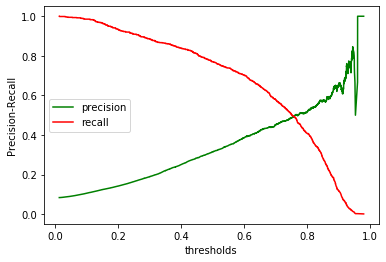

In [154]:
y_test_pred_prob = gb_clf.predict_proba(X_test_pca)
pr , re, th = precision_recall_curve(y_test,y_test_pred_prob[:,1])

# plt.figure(figsize=(15,6.5))

plt.plot(th, pr[:-1], "g-")
plt.plot(th, re[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
# plt.vlines(x=.62,ymax=1.0,ymin=0,colors='y',linestyles='--')
# plt.vlines(x=.50,ymax=1.0,ymin=0,colors='b',linestyles='--')



## Gradient Boosting_PCA

## Non PCA Model (For Interpretation)  :  Decision Tree

In [155]:
final_data2.shape

(30001, 158)

#### ZScore Method to treat Outliers - Start

In [156]:
# calculate zscore

z = np.abs(stats.zscore(final_data2))

print("-------------Shape of DF before removing outliers--------------")
print(final_data2.shape)

final_data2 = final_data2[(z < 4.5).all(axis=1)] #If z>3 i'm loosing alot of data, not good in this case 

print("-------------Shape of DF after removing outliers--------------")
print(final_data2.shape)

-------------Shape of DF before removing outliers--------------
(30001, 158)
-------------Shape of DF after removing outliers--------------
(20509, 158)


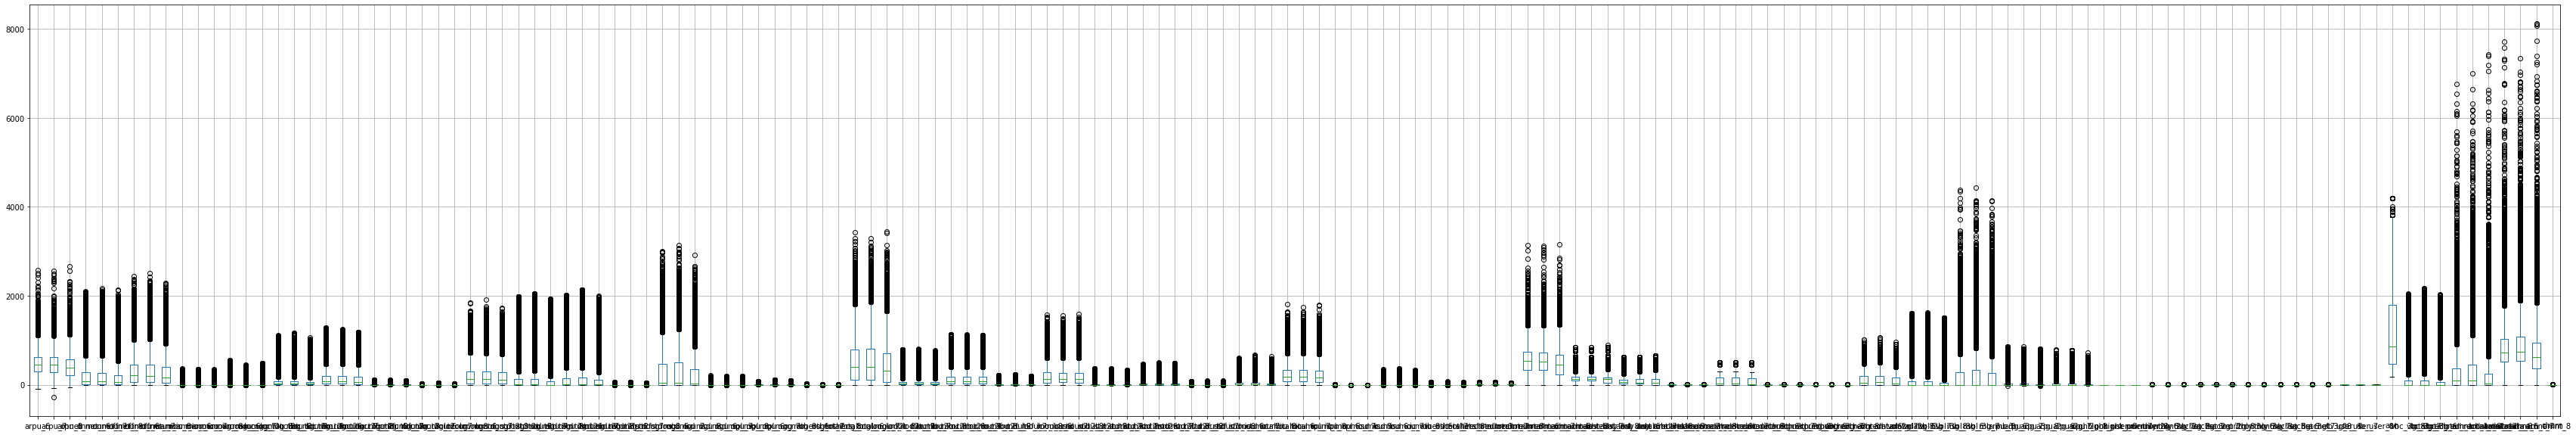

In [256]:
final_data2.boxplot(figsize=(60,10))

#### ZScore Method to treat Outliers - End

In [88]:
final_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 0 to 99984
Columns: 158 entries, arpu_6 to churn
dtypes: float64(132), int64(26)
memory usage: 24.9 MB


In [89]:
final_data2.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385  214.816  213.803         0.00         0.00         0.00   
8   378.721  492.223  137.362       413.69       351.03        35.08   
21  514.453  597.753  637.760       102.41       132.11        85.14   
23   74.350  193.897  366.966        48.96        50.66        33.58   
38  363.987  486.558  393.909       248.99       619.96       666.38   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
8          94.66         80.63        136.48            0.0            0.0   
21        757.93        896.68        983.39            0.0            0.0   
23         85.41         89.36        205.89            0.0            0.0   
38         88.86         50.58         97.81            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
8             0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
38             29.88             17.33              9.48             33.76   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00               0.0   
8              70.58             50.54              0.00               0.0   
21             87.93            104.81              0.75               0.0   
23             83.01            148.56              0.00               0.0   
38             16.19             18.96              0.00               0.0   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
38              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
38         63.64         33.53         28.44            219.11   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
38            602.63            656.89             55.09             34.38   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
8              75.69               0.0               0.0               0.0   
21            876.99               0.0               0.0               0.0   
23             39.61               0.0               0.0               0.0   
38             78.84               0.0     

In [157]:
# Let's further drop columns which is not gonna help further : 
# 1. Skewed columns 
# 2. Mobile Number 
# 3. Max data recharge amount
# 4. Last day recharge amount

drop_columns = [i for i in final_data2.columns if 'max_' in i]
last_day_columns = [i for i in final_data2.columns if 'last_day_' in i]


drop_columns = drop_columns + last_day_columns

print(drop_columns)

final_data2.drop(columns=drop_columns, inplace=True)

['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']


In [158]:
final_data2.shape

(20509, 149)

In [159]:
#Making data (Good Phase {combined} + Action Phase)

telco_gd_phs_cols = final_data2.filter(regex='_6|_7').columns.str[:-2].unique()

for i in telco_gd_phs_cols:
    new_col = "avg_"+i+"_gd_ph"
    col_6 = i+"_6"
    col_7 = i+"_7"
    #print(new_col)
    #print(col_6)
    #print(col_7)
    final_data2[new_col] = (final_data2[col_6]+final_data2[col_7])/2
    final_data2.drop(columns=[col_6,col_7], inplace=True)
    
final_data2.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'total_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8',
       'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'fb_user_8', 'aon', 'vbc_3g_8', 'total_rech_amnt_data_8',
       'total_rech_amnt_8', 'churn', 'avg_arpu_gd_ph', '

In [160]:
final_data2.shape

(20509, 100)

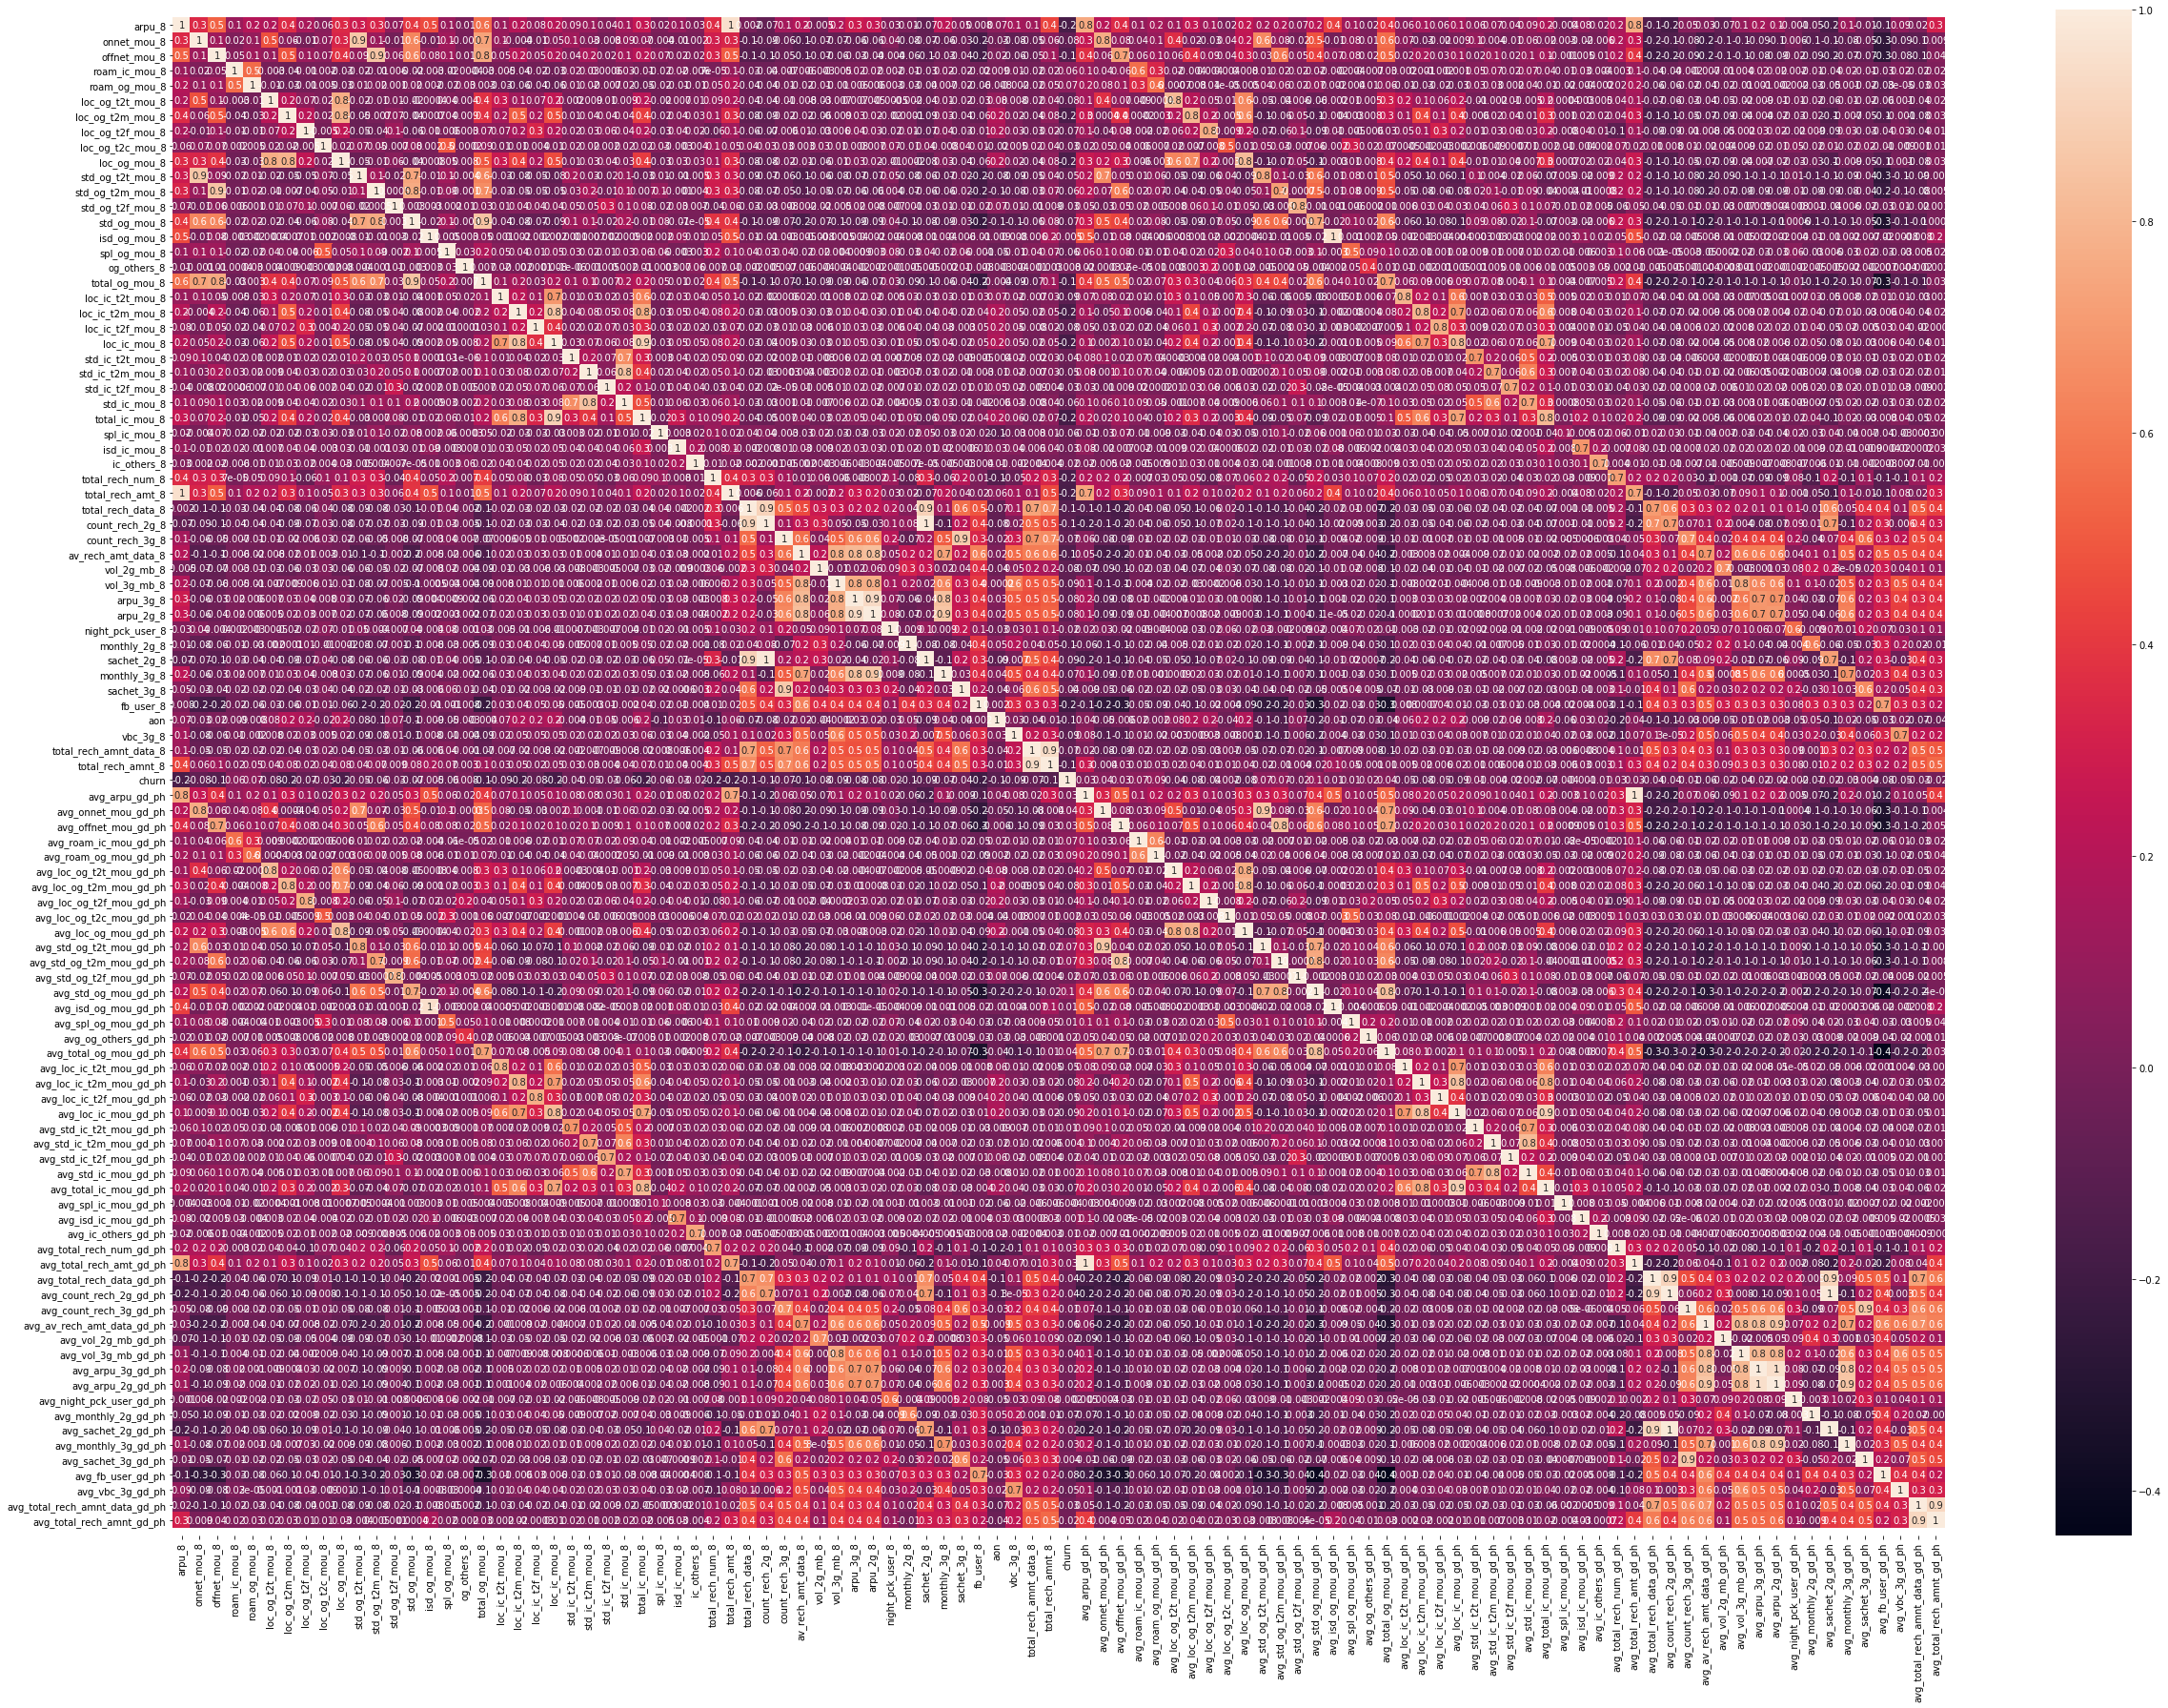

In [336]:
# Now let's check the multicollinearity of the remaining columns

plt.figure(figsize = (35,25))
ax=sb.heatmap(final_data2.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)
plt.tight_layout()

In [161]:
df_train,df_test = train_test_split(final_data2,train_size=.70,test_size=0.30,random_state=100)

In [162]:
print(df_train.shape)
print(df_test.shape)
# df_test[df_test.churn==1]

(14356, 100)
(6153, 100)


In [163]:
y_train_ = df_train.pop('churn')
X_train_ = df_train

In [164]:
y_test_ = df_test.pop('churn')
X_test_ = df_test

In [165]:
print('X_train_ : ',X_train_.shape)
print('y_train_ : ',y_train_.shape)
print('X_test_  : ',X_test_.shape)
print('y_test_  : ',y_test_.shape)

X_train_ :  (14356, 99)
y_train_ :  (14356,)
X_test_  :  (6153, 99)
y_test_  :  (6153,)


In [166]:
y_train_.value_counts()

0    13239
1     1117
Name: churn, dtype: int64

In [167]:
# Oversample and plot imbalanced dataset with SMOTE

counter = Counter(y_train_)
print("{} {}".format("Before handling class imbalance : ",counter))
# transform the dataset
oversample = SMOTE()
X_train_, y_train_ = oversample.fit_resample(X_train_, y_train_)
# summarize the new class distribution
counter = Counter(y_train_)
print("{} {}".format("After handling class imbalance : ",counter))

Before handling class imbalance :  Counter({0: 13239, 1: 1117})
After handling class imbalance :  Counter({0: 13239, 1: 13239})


In [168]:
print('X_train_ : ',X_train_.shape)
print('y_train_ : ',y_train_.shape)
print('X_test_  : ',X_test_.shape)
print('y_test_  : ',y_test_.shape)

X_train_ :  (26478, 99)
y_train_ :  (26478,)
X_test_  :  (6153, 99)
y_test_  :  (6153,)


In [169]:
# check the distribution of churn(1/0) in test and train after SMOTE

print(y_train_.value_counts())
print(y_test_.value_counts())

1    13239
0    13239
Name: churn, dtype: int64
0    5644
1     509
Name: churn, dtype: int64


In [170]:
# DecisionTreeClassifier?

## Decision Trees

In [164]:
# hyperparameter = {'max_depth' : range(5,16,5),
#                   'min_samples_split' : range(100,300,50),
#                   'min_samples_leaf' : range(50,300,50)
#                  }

hyperparameter = {'max_depth' : range(5,16,5),
                  'min_samples_split' : range(25,151,25),
                  'min_samples_leaf' : range(50,151,50)
                 }


dtree = DecisionTreeClassifier(random_state=100)

dt_grid = GridSearchCV(estimator=dtree,
             param_grid=hyperparameter,
             cv=5,
             scoring='recall',
             verbose=1,
             n_jobs=-1,
             return_train_score=True
             )

dt_grid.fit(X_train_,y_train_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 16, 5),
                         '

In [275]:
dt_grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 25}

In [166]:
out = pd.DataFrame(dt_grid.cv_results_)
out.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.490282      0.136258         0.031315        0.004253   
1       2.380528      0.216968         0.030150        0.011456   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      25   
1               5                     50                      50   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.850076   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.850076   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.914653           0.912009            0.89762           0.914275   
1           0.914653           0.912009            0.89762           0.914275   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.897726        0.024637               27            0.902559   
1         0.897726        0.024637               27            0.902559   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.900009            0.918421            0.890955   
1            0.900009            0.918421            0.890955   

   split4_train_score  mean_train_score  std_train_score  
0            0.905958          0.903581         0.008934  
1            0.905958          0.903581         0.008934

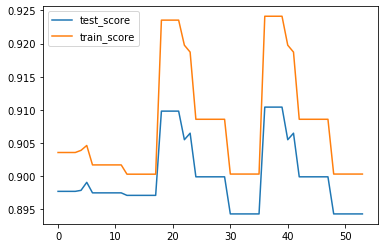

In [167]:
plt.plot(out.index,out.mean_test_score)
plt.plot(out.index,out.mean_train_score)
plt.legend(['test_score','train_score'])

In [106]:
out.iloc[15:24]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       2.963430      0.146902         0.025352        0.004622   
16       3.233389      0.127823         0.028485        0.006294   
17       3.426063      0.450253         0.037287        0.011709   
18       3.425211      0.538975         0.031955        0.010960   
19       3.063302      0.116652         0.035045        0.009183   
20       5.614559      0.166296         0.030324        0.008116   
21       5.668771      0.091652         0.024304        0.005331   
22       5.565936      0.085936         0.028929        0.003844   
23       5.350027      0.180591         0.028311        0.008340   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
15               5                    200                     250   
16               5                    250                     100   
17               5                    250                     150   
18               5                    250                     200   
19               5                    250                     250   
20              10                     50                     100   
21              10                     50                     150   
22              10                     50                     200   
23              10                     50                     250   

                                               params  split0_test_score  \
15  {'max_depth': 5, 'min_samples_leaf': 200, 'min...           0.851243   
16  {'max_depth': 5, 'min_samples_leaf': 250, 'min...           0.851761   
17  {'max_depth': 5, 'min_samples_leaf': 250, 'min...           0.851761   
18  {'max_depth': 5, 'min_samples_leaf': 250, 'min...           0.851761   
19  {'max_depth': 5, 'min_samples_leaf': 250, 'min...           0.851761   
20  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.867815   
21  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.871181   
22  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.864966   
23  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.859529   

    split1_test_score  split2_test_score  split3_test_score  \
15           0.871051           0.879596           0.876343   
16           0.871310           0.877654           0.876732   
17           0.871310           0.877654           0.876732   
18           0.871310           0.877654           0.876732   
19           0.871310           0.877654           0.876732   
20           0.899922           0.895650           0.902370   
21           0.893967           0.893449           0.899521   
22           0.895262           0.894873           0.897579   
23           0.894744           0.894873           0.894730   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
15           0.871941         0.870035        0.009890               53   
16           0.871941         0.869880        0.009402               57   
17           0.871941         0.869880        0.009402               57   
18           0.871941         0.869880        0.009402               57   
19           0.871941         0.869880        0.009402               57   
20           0.896025         0.892356        0.012523                2   
21           0.892788         0.890181        0.009798                3   
22           0.886832         0.887902        0.012030                5   
23           0.886573         0.886090        0.013656                7   

    split0_train_score  split1_train_score  split2_train_score  \
15            0.877840            0.872726            0.873115   
16            0.874506            0.872532            0.872694   
17            0.874506            0.872532            0.872694   
18            0.874506            0.872532            0.872694   
19            0.874506            0.872532            0.872694   
20            0.913025            0.905386            0.906228   
21            0.908364     

In [172]:
dt = DecisionTreeClassifier(max_depth=5,
                            min_samples_leaf=50,
                            min_samples_split=25
                            )

dt.fit(X_train_,y_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [173]:
y_test_pred = dt.predict(X_test_)
y_test_pred_prob = dt.predict_proba(X_test_)
#on train
# y_train_pred = dt.predict(X_train_)

In [174]:
# print(classification_report(y_train_,y_train_pred))
# print('********************************************')
print(classification_report(y_test_,y_test_pred),'\n\n') 
print('OverAll Accuracy of Model:',accuracy_score(y_test_,y_test_pred))
# accuracy_score

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5644
           1       0.33      0.80      0.47       509

    accuracy                           0.85      6153
   macro avg       0.66      0.83      0.69      6153
weighted avg       0.93      0.85      0.88      6153
 


OverAll Accuracy of Model: 0.8501543962294815


In [175]:
C_M = confusion_matrix(y_test_,y_test_pred)
C_M 

array([[4823,  821],
       [ 101,  408]], dtype=int64)

In [176]:
print('Precision :',metrics.precision_score(y_test_,y_test_pred))

print('Recall :',metrics.recall_score(y_test_,y_test_pred))

Precision : 0.33197721724979656
Recall : 0.8015717092337917


In [177]:
Sensitivity_with_class_imbalance_handling = C_M[1,1]/(C_M[1,1]+C_M[1,0])
print('Sensitivity_with_class_imbalance_handling :', Sensitivity_with_class_imbalance_handling) 

print('\n***********************************************\n')

Specificity_with_class_imbalance_handing = (C_M[0,0])/(C_M[0,0]+C_M[0,1])
print('Specificity_with_class_imbalance_handing :', Specificity_with_class_imbalance_handing)

Sensitivity_with_class_imbalance_handling : 0.8015717092337917

***********************************************

Specificity_with_class_imbalance_handing : 0.8545357902197024


In [178]:
#false postive rate - predicting churn when customer does not have churned
False_Positive_Rate = C_M[0,1]/(C_M[0,0]+C_M[0,1])
print('False_Positive_Rate_with_class_imbalance_handling :', False_Positive_Rate)#0.1791298024481881
#is too less which is good
print('\n**************************************************************************************\n')
False_Negative_Rate = C_M[1,0]/(C_M[1,1]+C_M[1,0])
print('False_Negative_Rate_with_class_imbalance_handling :', False_Negative_Rate)#0.17866666666666667

False_Positive_Rate_with_class_imbalance_handling : 0.14546420978029767

**************************************************************************************

False_Negative_Rate_with_class_imbalance_handling : 0.19842829076620824


Text(0, 0.5, 'Precision-Recall')

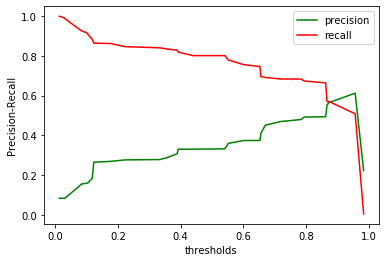

In [179]:
pre , rec, thr = precision_recall_curve(y_test_,y_test_pred_prob[:,1])

# plt.figure(figsize=(15,6.5))

plt.plot(thr, pre[:-1], "g-")
plt.plot(thr, rec[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
# plt.vlines(x=.62,ymax=1.0,ymin=0,colors='y',linestyles='--')
# plt.vlines(x=.50,ymax=1.0,ymin=0,colors='b',linestyles='--')



## Decision Trees_END

In [180]:
imp = list(dt.feature_importances_)

In [181]:
XX = pd.DataFrame({'Feature': X_test_.columns,'Importance':imp})
XX = XX.sort_values(by='Importance',ascending=False)
XX

Feature  Importance
49          total_rech_amnt_8    0.565026
4               roam_og_mou_8    0.214732
26             total_ic_mou_8    0.109973
45                  fb_user_8    0.032140
15               spl_og_mou_8    0.012128
..                        ...         ...
35         av_rech_amt_data_8    0.000000
34            count_rech_3g_8    0.000000
33            count_rech_2g_8    0.000000
32          total_rech_data_8    0.000000
98  avg_total_rech_amnt_gd_ph    0.000000

[99 rows x 2 columns]

##  Top Features

In [182]:
# sb.barplot?

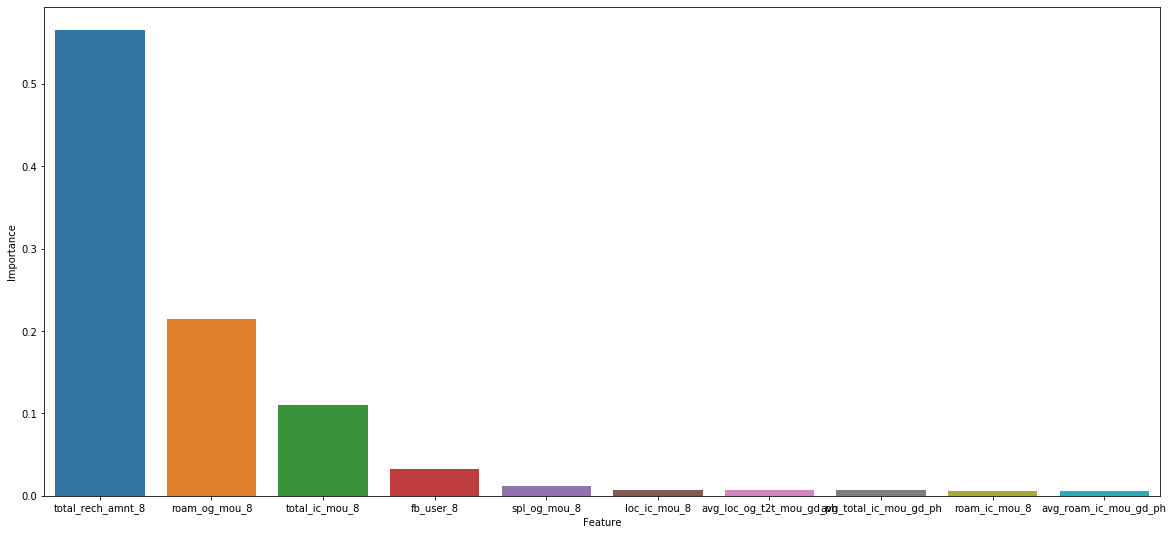

In [183]:
plt.figure(figsize=(20,9))
sb.barplot(XX.Feature.iloc[:10],XX.Importance,)
# plt.plot(XX.Feature,XX.Importance)
# plt.ylim()

### Analysis:

Above visual representaion represents the importance of top 10 features. Out of them 'total_rech_amnt_8' is the best predictor for this problem followed by 'roam_og_mou_8' and 'total_in_mou_8'.

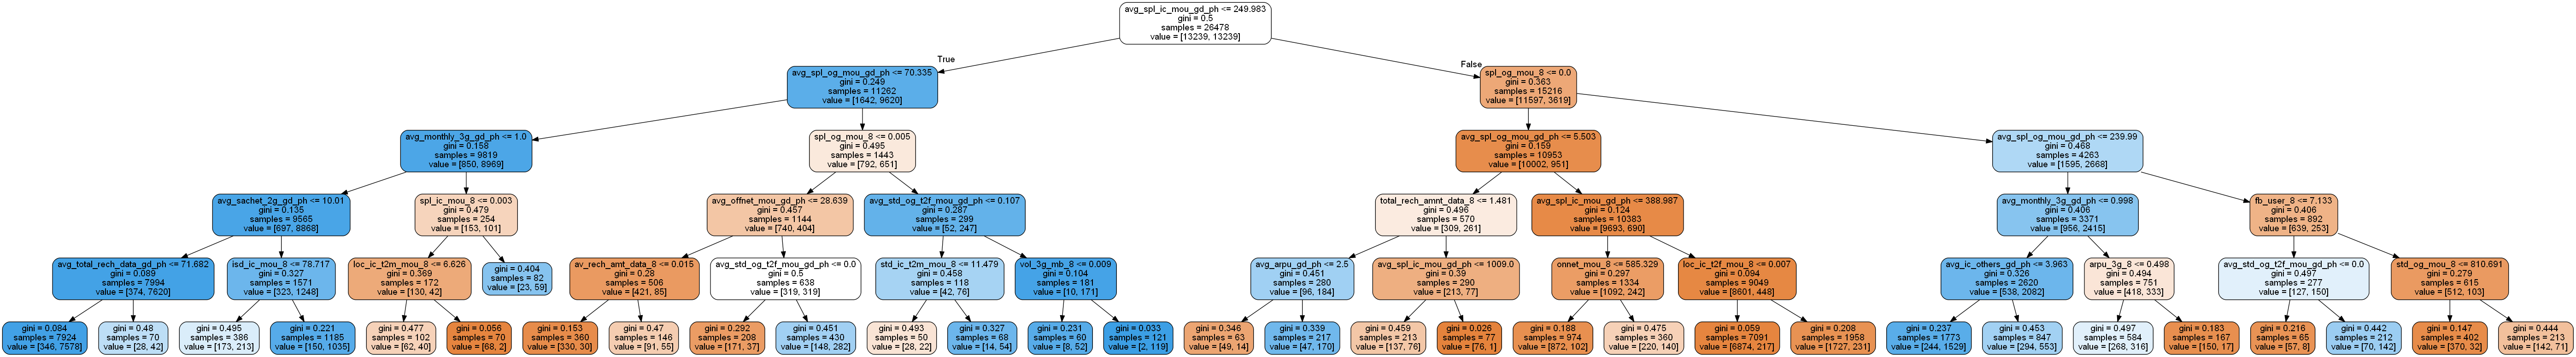

In [184]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=XX.Feature.values, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# graph.write_pdf("dt_Telecom_Churn_Final.pdf")

In [185]:
# roc_auc_score?
X_train_.shape

(26478, 99)

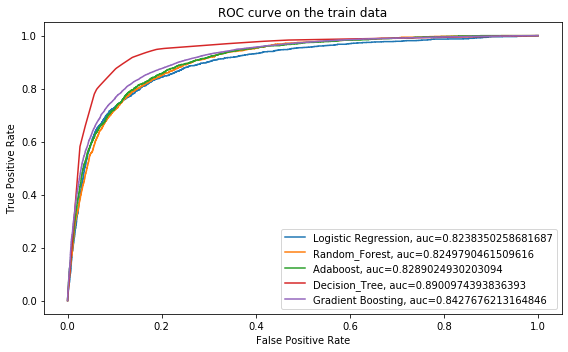

In [186]:
plt.figure(figsize=(8,5),num=1).clf()
#Logistic Regression
y_train_pred = logreg.predict_proba(X_train_pca) #logreg.fit(X_train_pca,y_train)
fpr, tpr, th = metrics.roc_curve(y_train,y_train_pred[:,1])
y_train_pred = logreg.predict(X_train_pca)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)

# Random Forest
y_train_pred = rf.predict_proba(X_train_pca)
fpr, tpr, th = metrics.roc_curve(y_train,  y_train_pred[:,1])
y_train_pred= rf.predict(X_train_pca)
auc = metrics.roc_auc_score(y_train, y_train_pred)
plt.plot(fpr,tpr,label="Random_Forest, auc="+str(auc))
plt.legend(loc=4)

# AdaBoost Classifier #adb_final
y_train_pred = adb_final.predict_proba(X_train_pca)
fpr, tpr, th = metrics.roc_curve(y_train,  y_train_pred[:,1])
y_train_pred = adb_final.predict(X_train_pca)
auc = metrics.roc_auc_score(y_train, y_train_pred)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))
plt.legend(loc=4)
         
#Decision Tree
y_train_pred = dt.predict_proba(X_train_)
fpr, tpr, th = metrics.roc_curve(y_train_, y_train_pred[:,1])
y_train_pred = dt.predict(X_train_)
auc = metrics.roc_auc_score(y_train_, y_train_pred)
plt.plot(fpr,tpr,label="Decision_Tree, auc="+str(auc))
plt.legend(loc=4)  
    
#Gradient Boosting Classifier
y_train_pred = gb_clf.predict_proba(X_train_pca__gr)
fpr, tpr, th = metrics.roc_curve(y_train__gr,  y_train_pred[:,1])
y_train_pred = gb_clf.predict(X_train_pca__gr)
auc = metrics.roc_auc_score(y_train__gr, y_train_pred)
plt.plot(fpr,tpr,label="Gradient Boosting, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve on the train data')
plt.tight_layout()

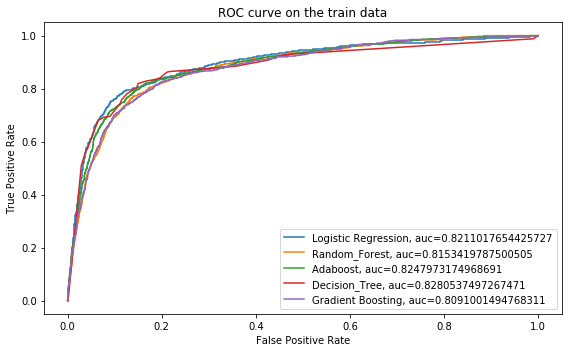

In [187]:
plt.figure(figsize=(8,5),num=1).clf()
#Logistic Regression
y_test_pred = logreg.predict_proba(X_test_pca) #logreg.fit(X_train_pca,y_train)
fpr, tpr, th = metrics.roc_curve(y_test,y_test_pred[:,1])
y_test_pred = logreg.predict(X_test_pca)
auc = metrics.roc_auc_score(y_test,  y_test_pred)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)

# Random Forest
y_test_pred = rf.predict_proba(X_test_pca)
fpr, tpr, th = metrics.roc_curve(y_test,  y_test_pred[:,1])
y_test_pred= rf.predict(X_test_pca)
auc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="Random_Forest, auc="+str(auc))
plt.legend(loc=4)

# AdaBoost Classifier #adb_final
y_test_pred = adb_final.predict_proba(X_test_pca)
fpr, tpr, th = metrics.roc_curve(y_test,  y_test_pred[:,1])
y_test_pred = adb_final.predict(X_test_pca)
auc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))
plt.legend(loc=4)
         
#Decision Tree
y_test_pred = dt.predict_proba(X_test_)
fpr, tpr, th = metrics.roc_curve(y_test_, y_test_pred[:,1])
y_test_pred = dt.predict(X_test_)
auc = metrics.roc_auc_score(y_test_, y_test_pred)
plt.plot(fpr,tpr,label="Decision_Tree, auc="+str(auc))
plt.legend(loc=4)  
    
#Gradient Boosting Classifier
y_test_pred = gb_clf.predict_proba(X_test_pca)
fpr, tpr, th = metrics.roc_curve(y_test,  y_test_pred[:,1])
y_test_pred = gb_clf.predict(X_test_pca)
auc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="Gradient Boosting, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve on the train data')
plt.tight_layout()

## Analysis :

Above two plots represents the performace of all the fitted models on Train set and on Test set.

Decision Trees performs very well on Train set (roc_auc_score = 88) and on Test set (roc_auc_score = 82.59) also having good recall : 81%

But,<br>
AdaBoost and Logistics Regression also performing well on Trian and Test set having (roc_auc_score = 82.89,82.47) and (roc_auc_score = 82.38,82.11) respectively also having recall ( AdaBoost : 81% , Logistics : 82.13%).

Since in Telecom Churn case study we don't want any churned as predicted non-churned thus we want to predict churn as churn only (focusedn in True +ive rate/ Recall/ Sensitivity) and we are fine if some of the non-churn are predicted as churn.

Hence, Logistics Model is best among all the models having 82% recall.



# Recommended Strategy to Manage Customer Churn